In [ ]:
pip install -U scikit-learn

# **Week 1: Selected the Ecommerce Customer Churn Analysis and Prediction dataset.**

In [1]:
# importing libraries necessary for EDA and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
# loading the e-commerce churn analysis dataset and saving it as churn_data
churn_data = pd.read_excel('/content/E Commerce Dataset.xlsx')

In [15]:
#copying and saving the dataset as data inorder to retain the original dataset
data = churn_data.copy()
data

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [ ]:
# gives an idea about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# displays the size of the dataset
data.shape

(5630, 20)

In [ ]:
# gives the count of unique values in the variables
data.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [ ]:
# counts the number of null values
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# displays the count of duplicates
data.duplicated().sum()

0

In [ ]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

float64    8
int64      7
object     5
Name: count, dtype: int64

In [ ]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

# **Week 2: Data Understanding and EDA.**

## Correlation Heatmap
#### Contains numeric columns only

<Axes: >

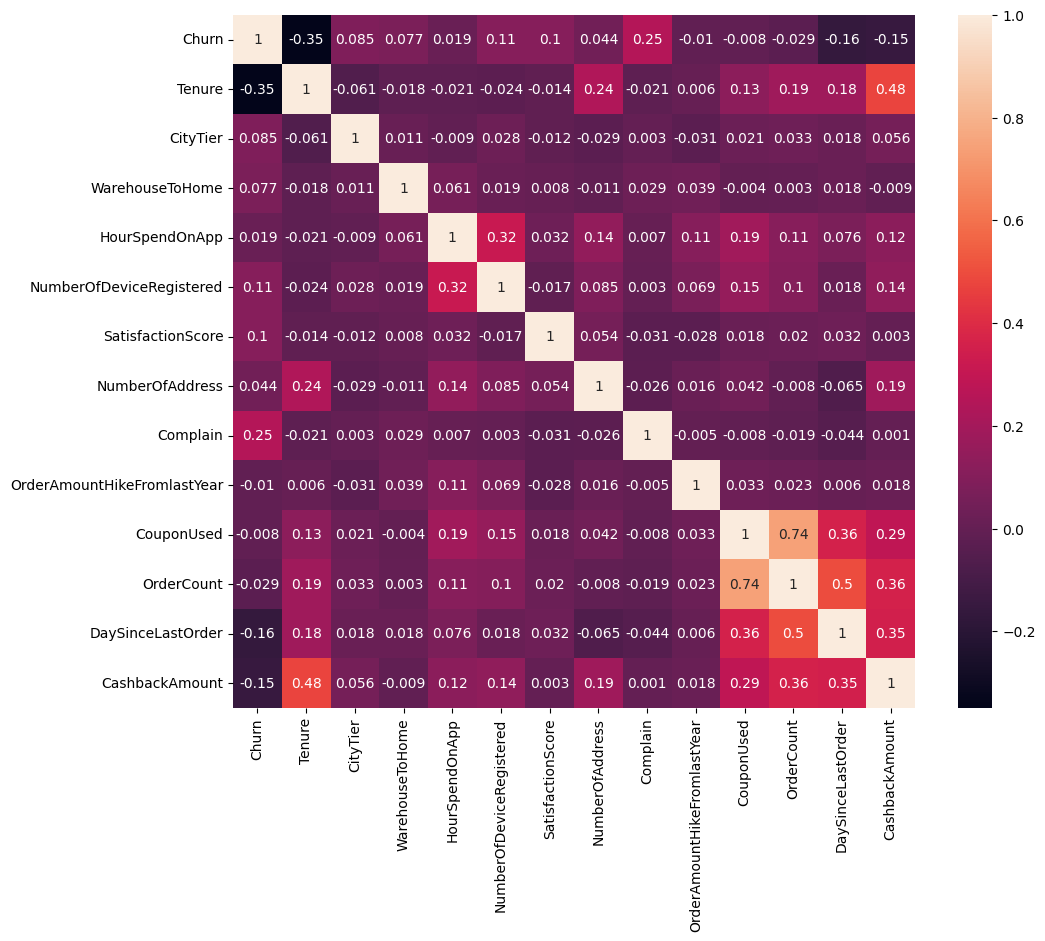

In [ ]:
plt.figure(figsize=(11, 9))
data1=data.drop(columns='CustomerID')
df=round(data1.corr(numeric_only=True),3)
sns.heatmap(df, fmt='.2g', annot=True)

## **CustomerID**

In [ ]:
#CustomerID
data["CustomerID"].nunique()

5630

* **CustomerID** column consist of unique ID provided to each customer and cannot be used in predicting the churn of customers.

## **Churn Rate**

In [ ]:
data["Churn"].value_counts().reset_index()

Churn  count
0      0   4682
1      1    948

### Percentage wise distrubution of Churn Rate

<Axes: title={'center': 'Percentage wise distrubution of Churn Rate'}, ylabel='count'>

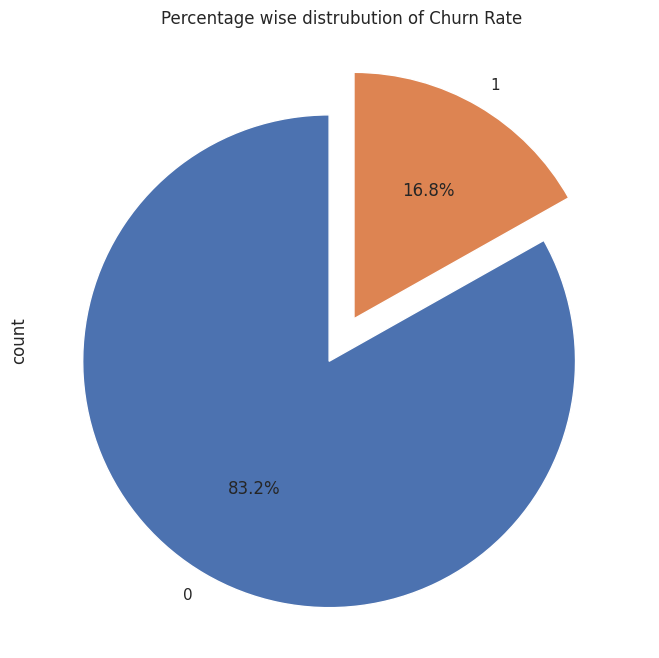

In [ ]:
data["Churn"].value_counts().plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, explode=(0.1,0.1), title='Percentage wise distrubution of Churn Rate')

#### Percentage wise distrubution of Churn Rate
* From the above given chart we reach the the conclusion that out of **5630** customers there are **4682** customers or **83.2%** of the total customer base is not churned. On the other hand, **948** customers or **16.8%** are churned.

* **16.8%** might seem like a smaller proportion of customers lost, but it is just lower than **One-Fifth** of the total customer base and this trend might continue in the next year and the consumers might end up choosing a competitors product, so immediate action should be taken.

## **Tenure**
### Customers count in each Tenure period

Text(0.5, 0.98, 'Customer count by Tenure in months')

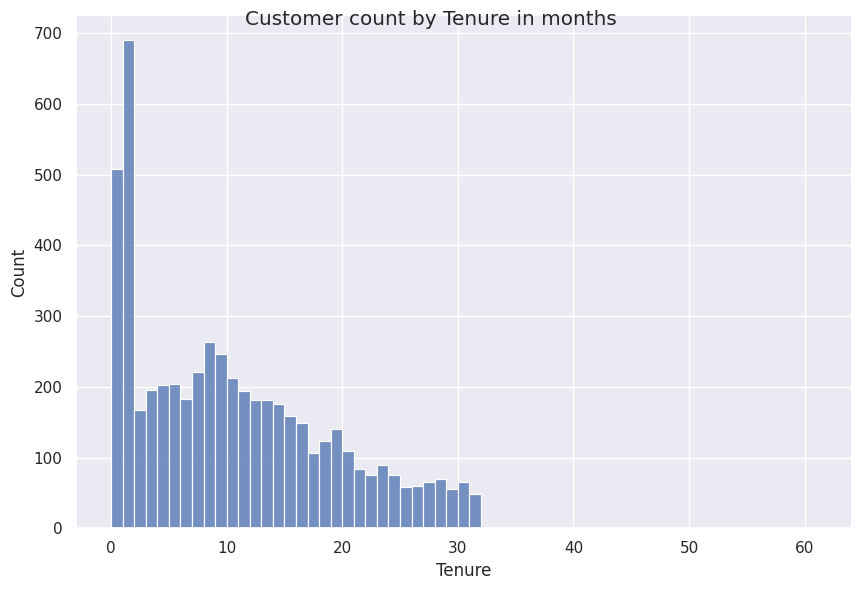

In [ ]:
sns.set_theme(rc={'figure.figsize':(8,5)}) # Figsize can be edited if charts are too large
ax2=sns.displot(data=data,x="Tenure",bins=61,height=6, aspect=11.7/8)
ax2.figure.suptitle("Customer count by Tenure in months")

#### Customer count by Tenure in months

* The above given Distribution graph indicates a higher number of customers having a Tenure period of 0 and 1 months.
* Moreover the number reduces steadily for customers with increase in Tenure period with the company.

### Top 10 Customers count percentage by Tenure

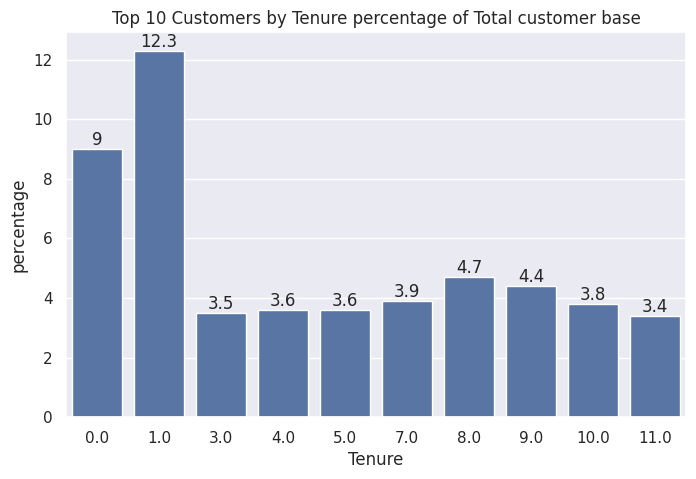

In [ ]:
df=data["Tenure"].value_counts().reset_index()
df=df.sort_values(by="count",ascending=False)
df["percentage"]=round((df['count']/data.shape[0])*100,1)
df1=df.head(10)

ax3=sns.barplot(data=df1,x='Tenure',y='percentage')
ax3.set_title("Top 10 Customers by Tenure percentage of Total customer base")
ax3.bar_label(ax3.containers[0])
plt.show()

#### Top 10 Customers count percentage by Tenure
* The percentage bar plot indicates the highest proportion of customers have less than 2 months tenure with **12.3%** and **9%** of the consumer base with a Tenure of **1** and **0** Months respectively.
* Followed by Tenure periods of **8** and **9** months, consisting of **4.7%** and **4.4%** of the total customer base respectively.
* **58.5%** of the customer base has a tenure period lower than 11 months.

Conclusion: There is a steady decrease in the proportion of consumers with increase in Tenure period using the platform. This might indicate an underlying issue with the service provided and can lead to more customers choosing a competitor for the same service, with lower number of users utilizing the service for an extended period of time.

### Customer churn count by Tenure Period

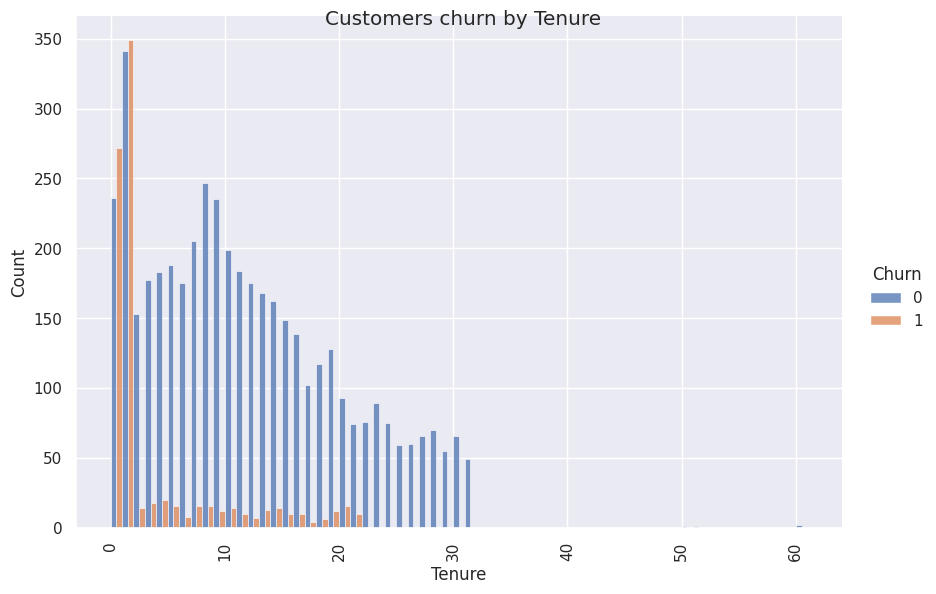

In [ ]:
ax4=sns.displot(data=data,x="Tenure",bins=61,hue="Churn", multiple='dodge',height=6, aspect=11.7/8)
ax4.tick_params(axis='x', rotation=90)
ax4.figure.suptitle("Customers churn by Tenure")
plt.show()

#### Customers churn by Tenure Period
* The distribution plot clearly indicates more than **50%** of customers churn for consumers having a tenure period of **0** and **1** months.
* The count of churn stays at a lower proportion for a higher tenure period.
* Churn count is **0** for consumers having **22 months** or **above** tenure period.

### Percentage of Churned customers to Total customer in a Tenure period

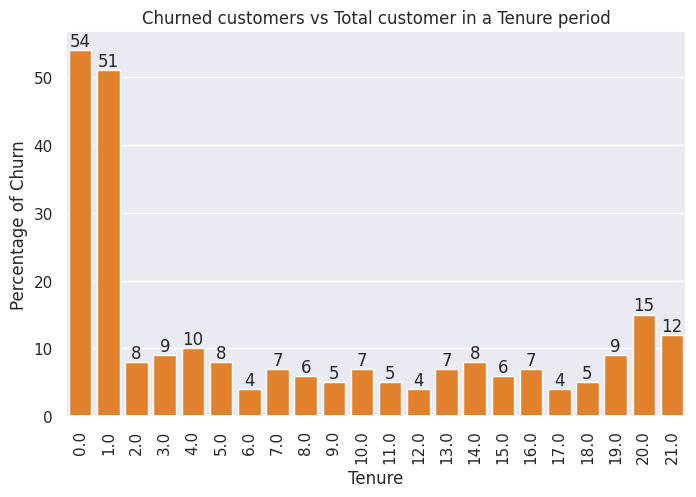

In [ ]:
Churn_ten=data.groupby(["Tenure"])['Churn'].sum().reset_index()
Ten_total=data.groupby(["Tenure"])['Churn'].count().reset_index()
Churn_ten["Total Customers"]=Ten_total['Churn']
Churn_ten["Percentage of Churn"]=round((Churn_ten["Churn"]/Churn_ten["Total Customers"])*100,0)
Churn_ten=Churn_ten.head(22)

ax5=sns.barplot(data=Churn_ten,x='Tenure',y='Percentage of Churn',color="#ff7f0e")
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Churned customers vs Total customer in a Tenure period")
ax5.bar_label(ax5.containers[0])
plt.show()

#### Percentage of Churned customers to Total customer in a Tenure period

The bar chart indicates the percentage of churned customers to the total customers in each Tenure period separately.
* Tenure periods of **0** and **1** months are having the highest proportion of churned customers with **54%** and **51%** respectively.
* From the tenure period of 2 months and above, the churn percentage from total customer base varies **below the 10%** range.
* Only going above with consumers having a tenure period of **20** and **21** months with **15%** and **12%** respectively.

**Conslusion:** There is a worrying trend with newer customers, ie consumers having less than 2 months of tenure period prefering to end the service. This is a major issue and can be due to multiple reasons that should be understood and resolved for mitigation of churn.

## Why is there a high churn rate with new customers?

### 1.Tenure period vs Average cashback in last month

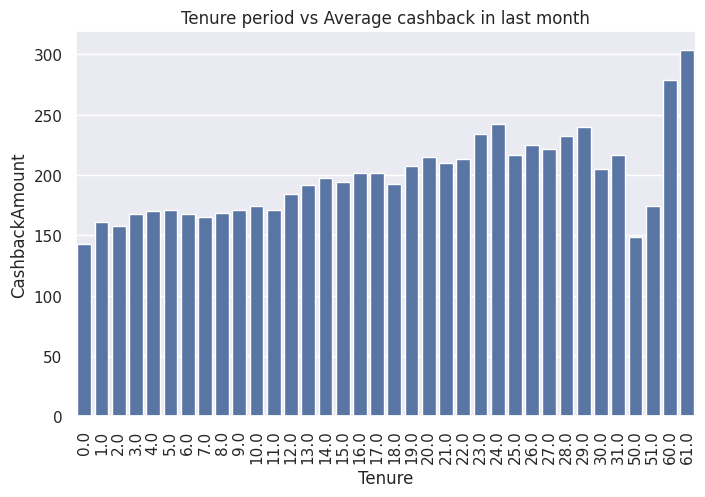

In [ ]:
Cash_tenure=data.groupby(["Tenure"])['CashbackAmount'].mean().reset_index()
ax6=sns.barplot(data=Cash_tenure,x='Tenure',y='CashbackAmount')
ax6.tick_params(axis='x', rotation=90)
ax6.set_title("Tenure period vs Average cashback in last month")
plt.show()

### Reason 1. Lower Average cashback given to Newer customers.

From the above given graph we can conclude the following:
* The Average Cashboack amount only increases with increase in tenure period.
* Customers with tenure of **0,1 and 2** months recieve comparitively lower amount of Cashbacks.
* Cashback is highest for customers having a longer tenure period.

**Conclusion:** This can have a correlation with the tendency of customers with lower tenure period to leave the service, as they are given the lowest amount of Cashback on average during the last month.

**Solution:** Better Cashback offers should be provided to newer consumers for better retention rate and giving them enough time to adjust to the platform. This can provide lower churn rates in the future.

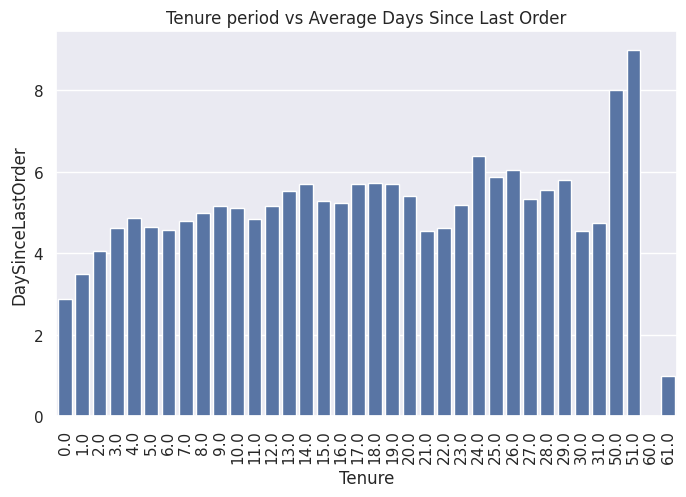

In [ ]:
Cash_days=data.groupby(["Tenure"])['DaySinceLastOrder'].mean().reset_index()
ax=sns.barplot(data=Cash_days,x='Tenure',y='DaySinceLastOrder')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Tenure period vs Average Days Since Last Order")
plt.show()

### 2. Tenure period vs Coupons used per customer in last month

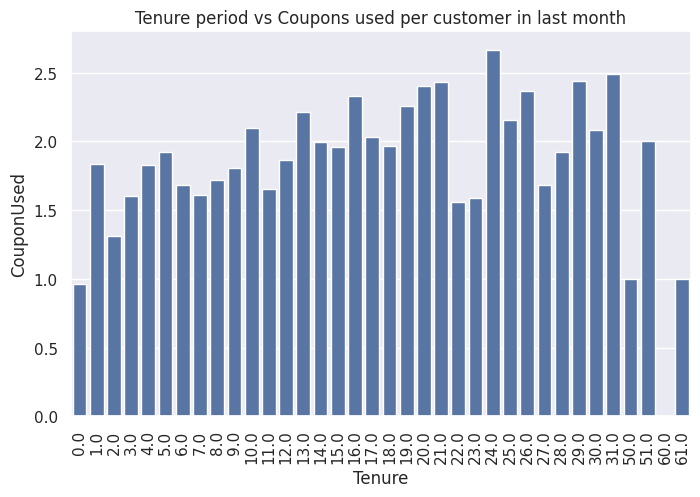

In [ ]:
Coupon_tenure=data.groupby(["Tenure"])['CouponUsed'].mean().reset_index()
ax13=sns.barplot(data=Coupon_tenure,x='Tenure',y='CouponUsed')
ax13.tick_params(axis='x', rotation=90)
ax13.set_title("Tenure period vs Coupons used per customer in last month")
plt.show()

### Reason 2: Lower number of Coupons used or provided to newer customers.
The bar graph gives insight into number of Coupons used by customers in each tenure period, it indicates the following:
* The Coupons used per customer is lowest during the lower tenure periods with 1 month tenure consumers showing the only exception with **1.8** coupons used per customers in that period.
* This value also tend to increase with increase in tenure period, but slowly reduces for the highest tenure periods.

**Conclusion:** The lower utilization of Coupons by newer customers can indicate 2 different scenarios:
* 1. Less coupons are provided to newer customers with low Tenure period.
* 2. Interface might not be user-friendly, making it difficult for new customers to access coupons.

**Solutions:** The solution to the 2 problem scenarios include:
* 1. Providing more or better coupons to newer customers will aid retention.
* 2. Make the interface more user-friendly for new customers to access and use the coupons.

## **Preferred Login Devices**
### Percentage wise distrubution of Prefered Login Device

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


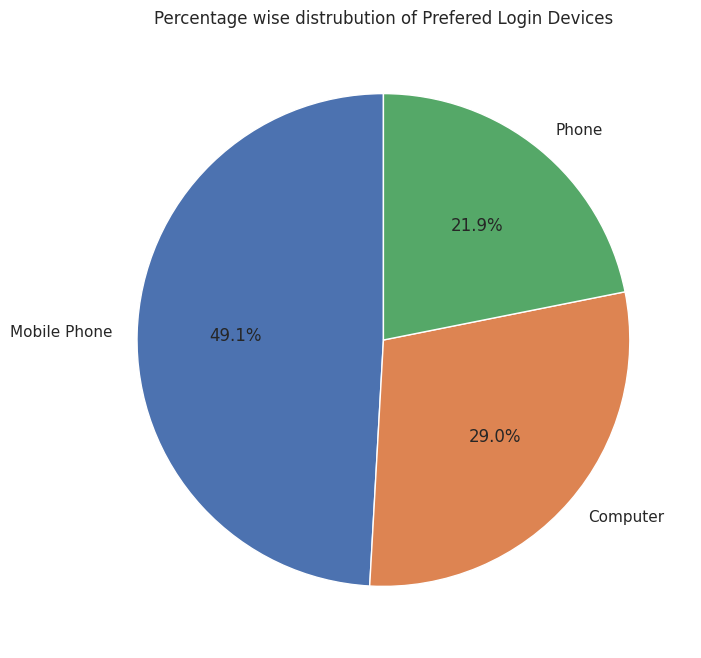

In [ ]:
pref_devices=data["PreferredLoginDevice"].value_counts()
print(pref_devices)
pref_devices.plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, title='Percentage wise distrubution of Prefered Login Devices',ylabel='')
plt.show()

#### Percentage wise customer distrubution by Prefered Login Devices
* Mobile Phone users occupy the largest proportion of **49.1%** or **2765** customers.
* Followed by Consumers who prefer computers as login devices with **29%** and Phone users with **21.9%**.
* The Phone and Mobile phone catergories might seem the same but both show different characteristics.

### Customers Churn by different Preferred Login Devices

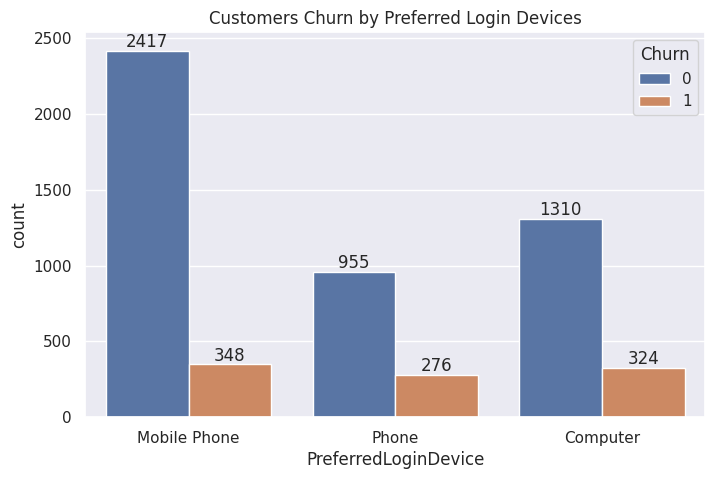

In [ ]:
ax7=sns.countplot(x="PreferredLoginDevice",hue ='Churn', data=data)
ax7.set_title("Customers Churn by Preferred Login Devices")
ax7.bar_label(ax7.containers[0])
ax7.bar_label(ax7.containers[1])
plt.show()

### Customers Churn percentage to total count by Preferred Login Devices

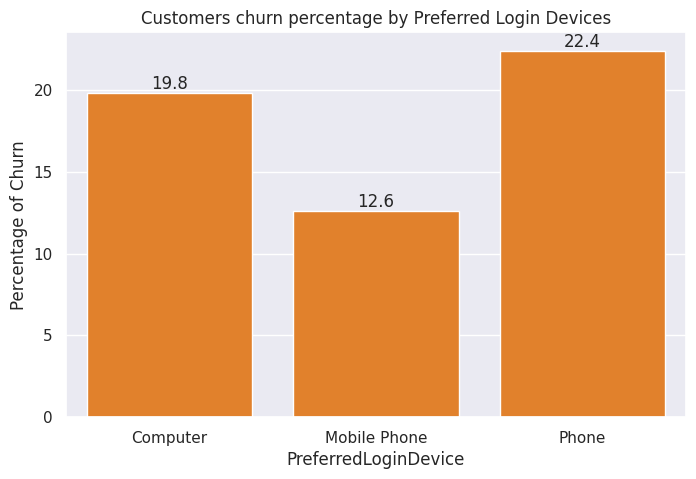

In [ ]:
Total=list(data.groupby(["PreferredLoginDevice"])['Churn'].count())
pref_churn= data.groupby(["PreferredLoginDevice"])['Churn'].sum().reset_index()
pref_churn['Total']=Total
pref_churn['Percentage of Churn']=round((pref_churn['Churn']/pref_churn['Total'])*100,1)

ax8=sns.barplot(data=pref_churn,x='PreferredLoginDevice',y='Percentage of Churn',color="#ff7f0e")
ax8.set_title("Customers churn percentage by Preferred Login Devices")
ax8.bar_label(ax8.containers[0])
plt.show()

#### Customers churn percentage by Preferred Login Devices
The above given bar graph illustrates the percentage of Customers churn to total customers using each Preferred Login Devices.
* Phone users have the highest proportion of churn rate with **22.4%** of the customers leaving the service.
* This is followed by Computer users having a churn proportion of **19.8%**.
* The login device having the least churn percentage is Mobile phones with only **12.6%** of the total users.

### Churn rate by Preferred Login Device vs Average tenure period

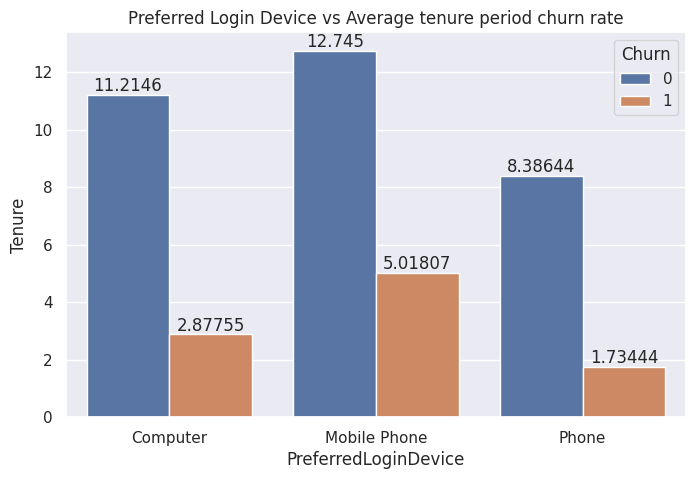

In [ ]:
Cash_ten=data.groupby(["PreferredLoginDevice",'Churn'])['Tenure'].mean().reset_index()
ax10=sns.barplot(data=Cash_ten,x='PreferredLoginDevice',y='Tenure',hue="Churn")
ax10.set_title("Preferred Login Device vs Average tenure period churn rate")
ax10.bar_label(ax10.containers[0])
ax10.bar_label(ax10.containers[1])
plt.show()

#### Churn rate by Preferred Login Device vs Average tenure period
The bar graph indicates the average tenure period of consumers with different Login devices based on Churn.
* Phone users are again having the least average tenure period before leaving the service of **1.7 months** or about **51** days, while the retained customers are comparatively new with only **8 months** of tenure.
* Computer users have the next best average tenure period for both retained customers and churned customers with **11.2 months** and **2.8 months** respectively.
* Mobile phone users tend to have a higher tenure in both scenarios, having a tenure period of **12.7 months** for retained consumers and **5 months** for churned customers.

**Conclusion:** Users who prefer Phone as the login device tend to last shortest with an average tenure of less than **2 months**. Even for not churned customers the number is the lowest at less than **9 months**. This statistics indicate a problem with the interface.

## Why is there a high churn rate and lower tenure with Phone users?
### 1. Preferred Login Device vs Average cashback in last month churn rate

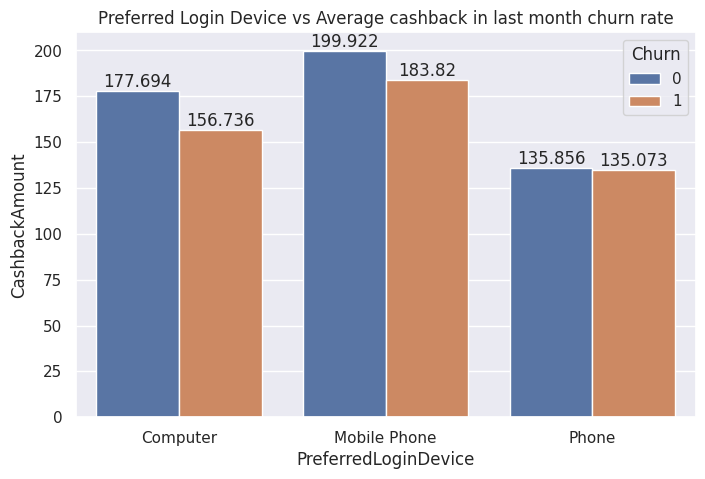

In [ ]:
Cash_pref=data.groupby(["PreferredLoginDevice","Churn"])['CashbackAmount'].mean().reset_index()
ax9=sns.barplot(data=Cash_pref,x='PreferredLoginDevice',y='CashbackAmount',hue="Churn")
ax9.set_title("Preferred Login Device vs Average cashback in last month churn rate")
ax9.bar_label(ax9.containers[0])
ax9.bar_label(ax9.containers[1])
plt.show()

#### Reason 1: Lower Average cashback correlates to churn.
The above given bar graph indicates the average Cashback given to customers in each login device catergory.
* Phone users recieve the lowest amount of cashback for both churned and non-churned getting an average of **135 Rupees** last month.
* Computer users were given higher Average cashbacks of **177 Rupees** for not churned and **156 Rupees** for churned customers.
* Mobile Phone users are given the highest average cashbacks of **199** and **183 Rupees** for retained and churned customers respectively.

**Conclusion:** The average cashback amount indicates an inverse relation with churn rate for Preferred login devices.
* Phone user base with **lowest average cashback** have the **highest churn percentage**.
* Mobile phone user base with **highest average cashback** have the **lowest churn percentage**

**Solution:** Higher cashback offers should be provided to customer while using Phone as a medium. Followed by increasing offers for the computer users.

### 2.Average Coupon used with Preferred Login Device:

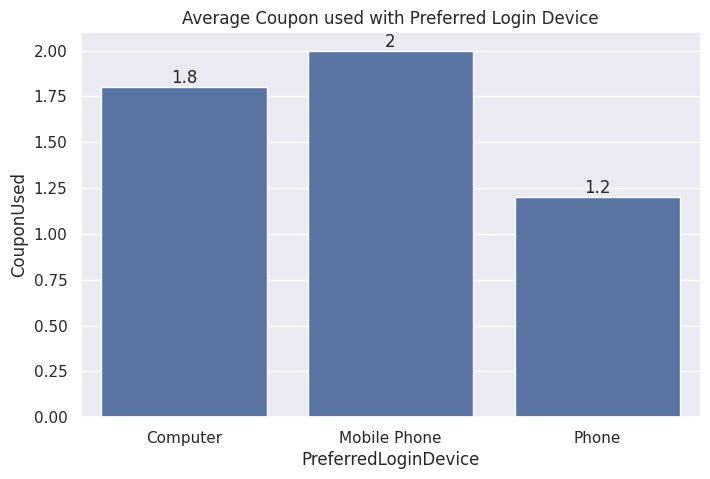

In [ ]:
ordercount=data.groupby(["PreferredLoginDevice"])["CouponUsed"].mean().round(1).reset_index()

ax12=sns.barplot(y="CouponUsed",x="PreferredLoginDevice", data=ordercount)
ax12.set_title("Average Coupon used with Preferred Login Device")
ax12.bar_label(ax12.containers[0])
plt.show()

#### Reason 2: Lower amount of coupons used leads to churn.
The above graph shows the average coupons used by a customer using different login devices.
* As it shows Phone users utlize less coupons on average or they are provided less coupons at **1.2** per customer.
* Likewise, Computer users use or are provided with a higher amount of coupons at **1.8 Coupons** per customer.
* Mobile phone users lead this metric too, with **2 coupons** used per customer.

**Conclusion:** Coupons used also shows patterns with **high correlation**. Phone users with lower coupon usage tend to churn more.

**Solution:** Encourage phone users to use more coupons or provide these customers with more amount of coupons as this can mitigate churn.

The above graph signifies the average tenure period of customers with respect to their preffered order catergory.
* The order catergory of **Electronics** items such as **'Laptop & Accessory', 'Mobile'** and **'Mobile Phone'** shows a lower tenure count.

In [ ]:
data['PreferredPaymentMode']=data['PreferredPaymentMode'].replace(["CC","COD"],["Credit Card","Cash on Delivery"])
data['PreferredPaymentMode'].unique()
data

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0          Credit Card    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

## **CityTier**

**CityTier is Devide into 3 Categories**

In [ ]:
data['CityTier'].unique()

array([3, 1, 2])

**City Tier 1 having more number of customers**

In [ ]:
data['CityTier'].value_counts()

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64

<Axes: xlabel='CityTier', ylabel='count'>

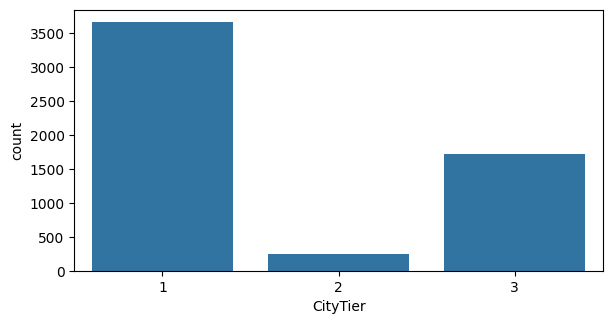

In [ ]:
# Histograms: Displaying the frequency distribution of values in a single variable.
plt.figure(figsize=(15,40))
plt.subplot(10,2,10)
sns.countplot(data=data, x='CityTier')

**City Tier 1- Most Number of Customers   
  City Tier 2 - Least Number of Customers**

****CityTier 3 - Most Churn rate,
  CityTier 1 -Least Churn rate****

<ipython-input-10-fa2aaa5eb23a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CityTier', y='Churn', data=data, palette='viridis')


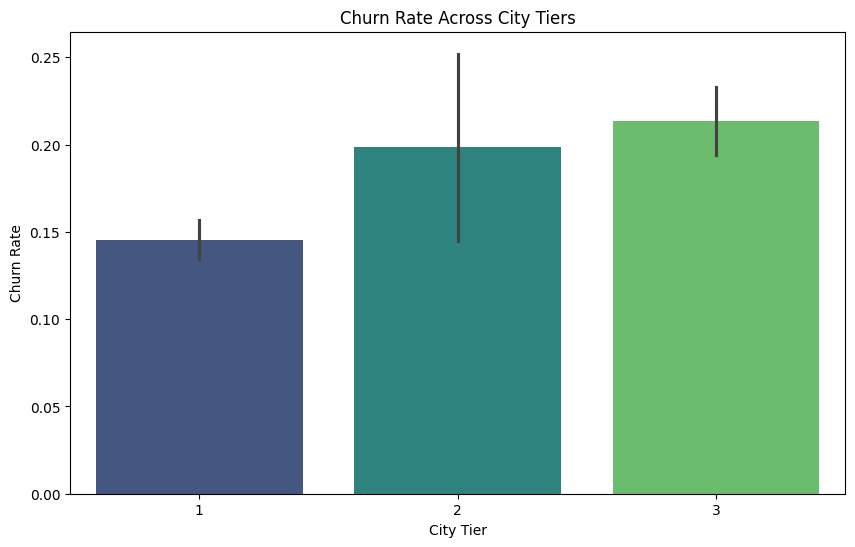

In [ ]:
# Churn rate across different city tiers
plt.figure(figsize=(10, 6))
sns.barplot(x='CityTier', y='Churn', data=data, palette='viridis')
plt.title('Churn Rate Across City Tiers')
plt.xlabel('City Tier')
plt.ylabel('Churn Rate')
plt.show()

The analysis provides valuable insights into the relationship between city tiers and churn rates, enabling businesses to make data-driven decisions and implement effective strategies to improve customer retention and satisfaction while considering city-specific factors.

In [ ]:
# Aggregate data to get churn rate per city tier
churn_rate_city_tier = data.groupby('CityTier')['Churn'].mean().reset_index()
churn_rate_city_tier

CityTier     Churn
0         1  0.145117
1         2  0.198347
2         3  0.213705

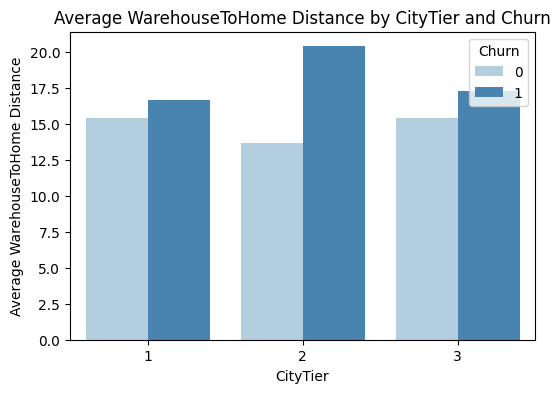

In [ ]:
grouped_data = data.groupby(['Churn', 'CityTier'])['WarehouseToHome'].mean().reset_index()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='CityTier', y='WarehouseToHome', hue='Churn', data=grouped_data, palette='Blues')
plt.title('Average WarehouseToHome Distance by CityTier and Churn')
plt.xlabel('CityTier')
plt.ylabel('Average WarehouseToHome Distance')
plt.legend(title='Churn', loc='upper right')
plt.show()

Avarage of churn is higher in city tier 3 , Eventhough City tier has half of City tier 1 customers

Conclusion: customers in city tier 3 shows high tendency to churn



*   Insight into Churn Rate Variation: Organization Need to specific offers or attractive product and Good Customer Service  to City Tier 3&2 Customers to retain in the platform.

*  Company should improve the overall experience for city tier 3&2 customers for increasing sale as well as retain customers
*   There should be more focus City Tier 2 customers because there is low number of customers and high churn rate .So that Drastic change of sale strategy should be there with City tier 2 customers.




*   City Tier 1 - Retaining Customer is high so that the Company Should follow the current strategy towards the city-tier 1 customers


* City Tier Impact on Churn: This visualization helps in understanding whether city tier has a significant impact on churn behavior among customers.

*Finding CityTier Statistics on the basis of tenure and ordercount sum*

In [ ]:
#  average tenure and total order count for each CityTier
city_tier_stats = data.groupby('CityTier').agg({'Tenure': 'mean', 'OrderCount': 'sum'}).reset_index()
print(city_tier_stats)

   CityTier     Tenure  OrderCount
0         1  10.528818     10298.0
1         2  11.169725       615.0
2         3   9.361740      5246.0


<ipython-input-34-252ef554d3e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CityTier', y='OrderCount', data=city_tier_stats, palette='viridis')


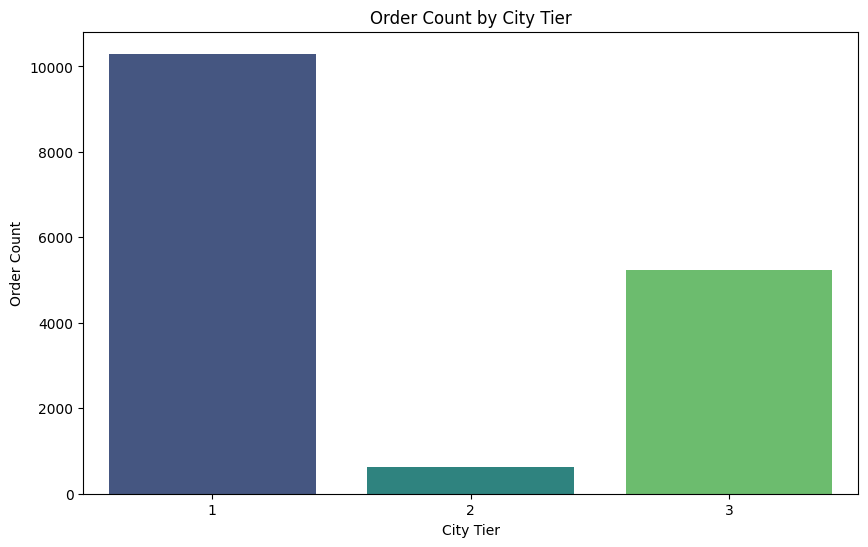

In [ ]:
# Visualize the total order count by CityTier

plt.figure(figsize=(10, 6))
sns.barplot(x='CityTier', y='OrderCount', data=city_tier_stats, palette='viridis')
plt.title('Order Count by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Order Count')
plt.show()

Highest Order Count - City Tier 1 Loest Order Count - City Tier 2

The analysis of the plot sheds light on the distribution of order counts across city tiers and offers valuable insights for strategic decision-making, market targeting, and understanding customer behavior. Further exploration and analysis could uncover additional nuances and opportunities for optimization and growth.

Conclusion - To increase the overall sale of the company, Concentrate on the CityTier 2 customers because there is low number of customers as well as their order count is very low when comparing with other city tiers.
To get the customers and orders from the city tier 2 advertisement and campaigns are needed then only people from city tier 2 will use this platform
Check if there is offline platform or other E commerce websites.
Deliver better offer and over all experience like fast delivery, better customer support.


## **Distance from Warehouse To Delivery Point.**

In [ ]:
stats = data['WarehouseToHome'].describe()
print(stats)

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64


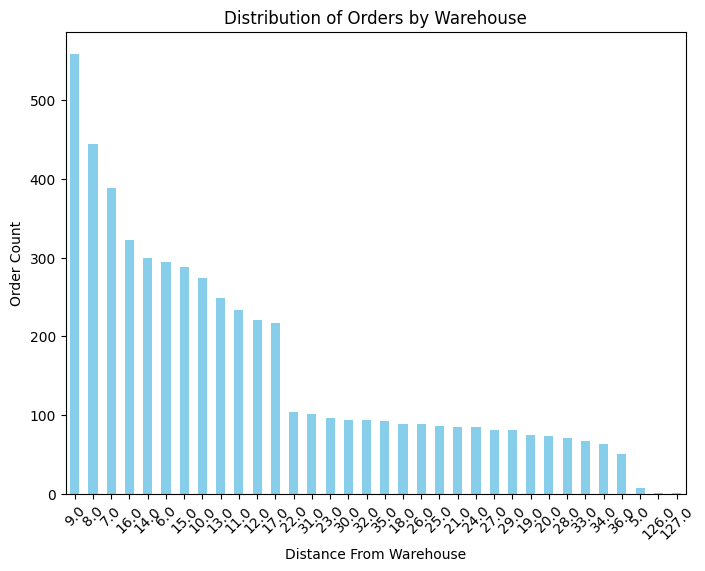

In [ ]:
# Plotting warehouse distribution
plt.figure(figsize=(8, 6))
warehouse_counts = data['WarehouseToHome'].value_counts()
warehouse_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders by Warehouse')
plt.xlabel('Distance From Warehouse')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

 Areas with high order counts at specific distances might suggest opportunities for optimizing delivery routes or establishing distribution centers closer to those locations. This could potentially reduce delivery times, costs, and enhance customer satisfaction.



Conclusion - In the range of 22-127 km the customers order count is low because of the delay in delivery time so that there should be a extra warehouse in that distance range by reducing delivery time company can advertise fast delivery serivice and improve order count.

<ipython-input-18-ac6547bd3fb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='WarehouseToHome', data=data, estimator=lambda x: sum(x) / len(x),palette='Set2')


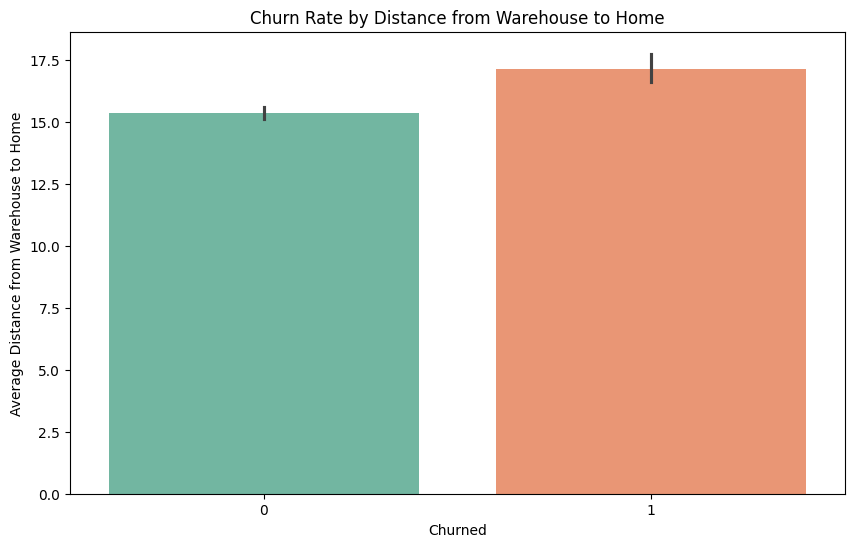

In [ ]:
# Visualize churn rates for different distance intervals
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='WarehouseToHome', data=data, estimator=lambda x: sum(x) / len(x),palette='Set2')
plt.title('Churn Rate by Distance from Warehouse to Home')
plt.xlabel('Churned')
plt.ylabel('Average Distance from Warehouse to Home')
plt.show()

Understanding the relationship between churn and the distance from the warehouse to the home provides valuable insights for operational decisions. For instance, if churned customers tend to be farther away, it might indicate challenges in delivering to those locations, such as longer delivery times or higher costs. Addressing these challenges could help improve customer retention.

Conclusion - from the analysis we can say that distance and delivery time increases the tendency of customer to churn also increases, so that comapny need to place extra warehose in required delivery points to offer customers company provide faster delivey.
Company can also advertise that they provide faster delivery than any other E-commerce platform. if the distance increases the delivery time also will increase on this mean time the mind set of the customers may also change go with other platform.
So that we can also avoid that scenario by build extra warehouse in the required region.

In [ ]:
# the average distance from warehouse to customer house for each CityTier
city_tier_distance = data.groupby('CityTier')['WarehouseToHome'].mean().reset_index()
city_tier_distance

CityTier  WarehouseToHome
0         1        15.597399
1         2        14.978632
2         3        15.818991

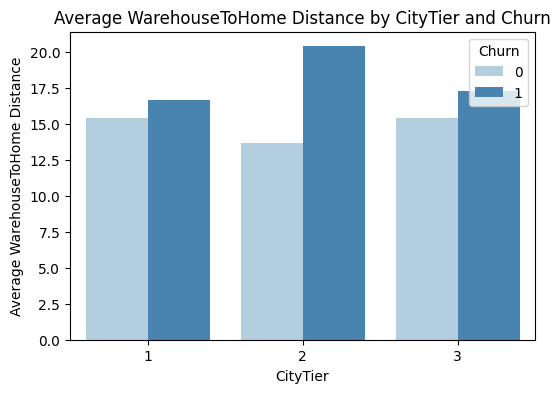

In [ ]:
grouped_data = data.groupby(['Churn', 'CityTier'])['WarehouseToHome'].mean().reset_index()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='CityTier', y='WarehouseToHome', hue='Churn', data=grouped_data, palette='Blues')
plt.title('Average WarehouseToHome Distance by CityTier and Churn')
plt.xlabel('CityTier')
plt.ylabel('Average WarehouseToHome Distance')
plt.legend(title='Churn', loc='upper right')
plt.show()

Conclusion - The customers of City tier 1 is very high but there is so many warehouse in city tier 1 so that company can provide faster delivery. but in the city tier 2 & 3 customers wait more time because there is limited ware house in that region. especially city tier 2. This may be one of the chance that there least customers in city tier2.

The analysis provides valuable insights into the average distance from the warehouse to the customer's house for different CityTiers, enabling informed decision-making to enhance operational efficiency and customer satisfaction.

## **Preferred Payment Mode.**

In [ ]:
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [16]:
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [ ]:
vc = data['PreferredPaymentMode'].value_counts().rename_axis('PreferredPaymentMode').reset_index(name='Counts')
vc

PreferredPaymentMode  Counts
0           Debit Card    2314
1          Credit Card    1774
2             E wallet     614
3     Cash on Delivery     514
4                  UPI     414

Understanding the distribution of preferred payment modes is crucial for businesses to tailor their services and offerings to meet customer needs effectively. It also opens avenues for optimizing payment processes and improving customer satisfaction, ultimately contributing to business growth and success.

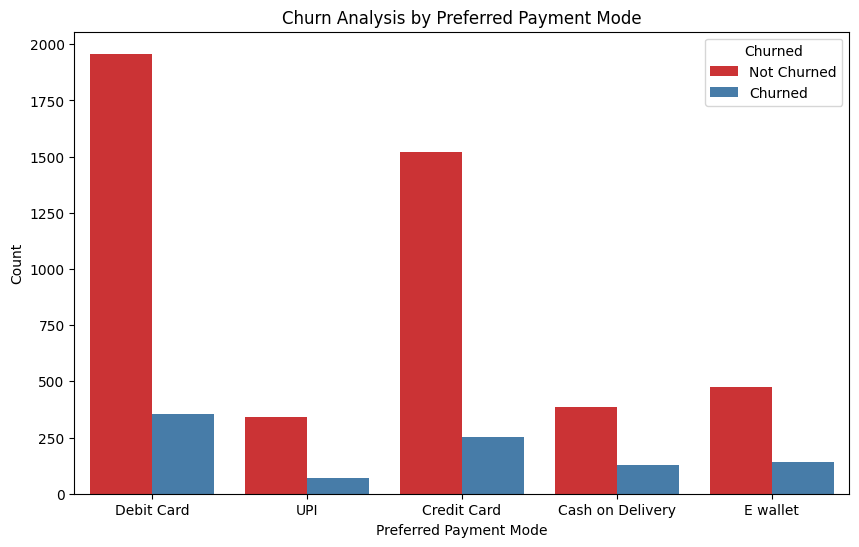

In [ ]:
# Visualize the distribution of churned and non-churned customers by preferred payment mode
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=data, palette='Set1')
plt.title('Churn Analysis by Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Not Churned', 'Churned'])
plt.show()

Conclusion - customers who plced order on the basis of bank cards are high because comapny provide certain bank offers and discounts on cc and db.Also Customers are avoiding direct intercations for money transactions bcause of that customers are placing order by using bank cards.
cash on delivery serivice is not that great so that the customers are not placing order using COD and the customers are not convenient and churn rate is high in the COD

Insights from this analysis can inform operational decisions related to payment processing systems, customer support, and retention strategies. Businesses can prioritize efforts to address challenges associated with payment modes that exhibit higher churn rates and enhance the customer experience.

<ipython-input-8-7d4d067a6e0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PreferredPaymentMode', y='Churn', data=churn_rate_by_payment_mode, palette='Set2')


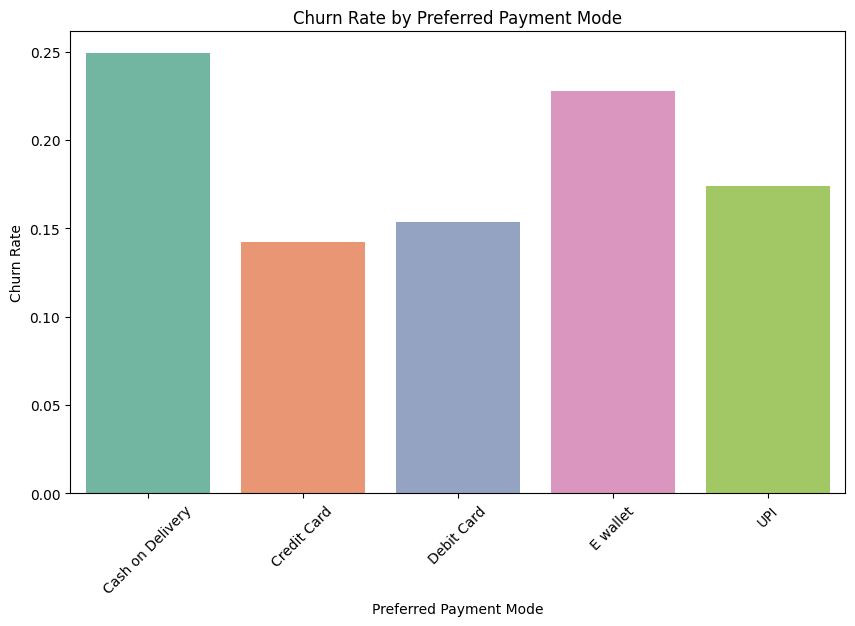

In [ ]:
# Calculate churn rate for each payment mode
churn_rate_by_payment_mode = data.groupby('PreferredPaymentMode')['Churn'].mean().reset_index()

# Visualize churn rates across different payment modes
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredPaymentMode', y='Churn', data=churn_rate_by_payment_mode, palette='Set2')
plt.title('Churn Rate by Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

Conclusion - Examine the avarage churn rate  customers who placing order by COD shows tendency churn and they are not retain in the platform.
may be the service of COD of delivery team is not that great so that comapny need to improve COD serivice for retain the customers.
Company should provide same offers and discounts for the bank cards beacuse customers are intrested in that offers

From this analysis can inform strategic decision-making processes such as marketing campaigns, user experience improvements in payment processing systems, and partnership opportunities with payment providers to enhance customer satisfaction and loyalty.

## **Gender.**

In [ ]:
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender
Male      3384
Female    2246
Name: count, dtype: int64


In [ ]:
# Analyze the relationship between gender and churn
# crosstab to see the counts of churn by gender
gender_churn_crosstab = pd.crosstab(data['Gender'], data['Churn'])
print(gender_churn_crosstab)

Churn      0    1
Gender           
Female  1898  348
Male    2784  600


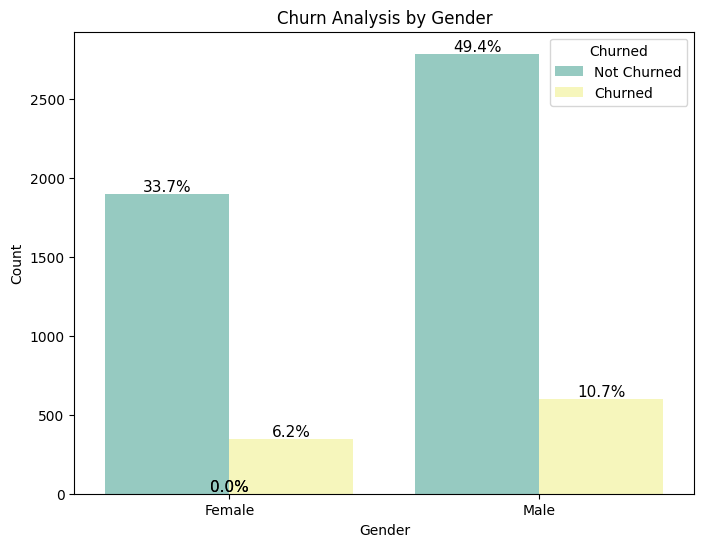

In [ ]:
# Visualize the distribution of churned and non-churned customers by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Churn', data=data, palette='Set3')
plt.title('Churn Analysis by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['Not Churned', 'Churned'])
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = height/total * 100
    plt.gca().annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Conclusion - males are the majoriy of the customers in the company because they are attracted in the products and offers. but female count lesser when comparing with males so that company need to provide good products for females which they are interested.
company need advertise for getting female customers then only sales can maintain the ratio of proportion for the sale count on the basis of gender.

 The analysis provides valuable insights into the relationship between gender and churn, allowing businesses to make informed decisions and implement effective strategies to improve customer retention and satisfaction, while considering gender-specific factors.

<ipython-input-33-c1690fdecf8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Churn', data=churn_rate_by_gender, palette='Set1')


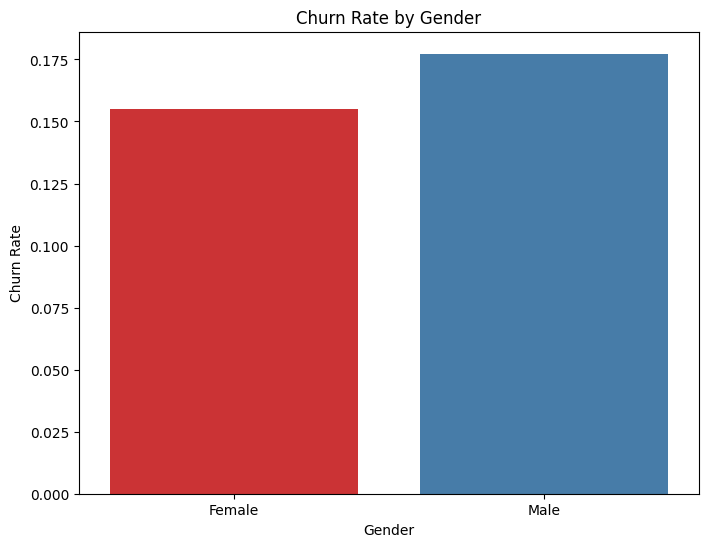

In [ ]:
# Calculate churn rate for each gender
churn_rate_by_gender = data.groupby('Gender')['Churn'].mean().reset_index()

# Visualize churn rates across different genders
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Churn', data=churn_rate_by_gender, palette='Set1')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

Conclusion- the Churn rate of males are high. The Sale count is high but the comapany should retain those male customers by providing good services and better customer support.
eventhogh lesser female count is lesser in churn rate. so that they are reataining in the platform
we can conclude that female churn rate is lower beacuse they need this platform but there is lack publicity about this platform in female category so there should be necessary advertisement to get that customers also

In conclusion, the analysis provides valuable insights into the relationship between gender and churn rates, enabling businesses to make data-driven decisions and implement effective strategies to improve customer retention and satisfaction while considering gender-specific factors.

## **HOURS SPEND ON APP**

In [ ]:
data['HourSpendOnApp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5630 entries, 0 to 5629
Series name: HourSpendOnApp
Non-Null Count  Dtype  
--------------  -----  
5375 non-null   float64
dtypes: float64(1)
memory usage: 44.1 KB


In [ ]:
data['HourSpendOnApp'].isna().sum()

255

There are 255 null values present in the HourSpendOnApp column.

In [ ]:
data['HourSpendOnApp'].value_counts(normalize=True)*100

HourSpendOnApp
3.0    49.990698
2.0    27.367442
4.0    21.879070
1.0     0.651163
0.0     0.055814
5.0     0.055814
Name: proportion, dtype: float64

The distribution of HourSpendOnApp column is
3.0 - 0.499907
2.0 - 0.273674
4.0 - 0.218791
1.0 - 0.006512
0.0 - 0.000558
5.0 - 0.000558
where 49% of the values are 3hours.

<ipython-input-13-2a79e7e45183>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['HourSpendOnApp'], palette='Set2')


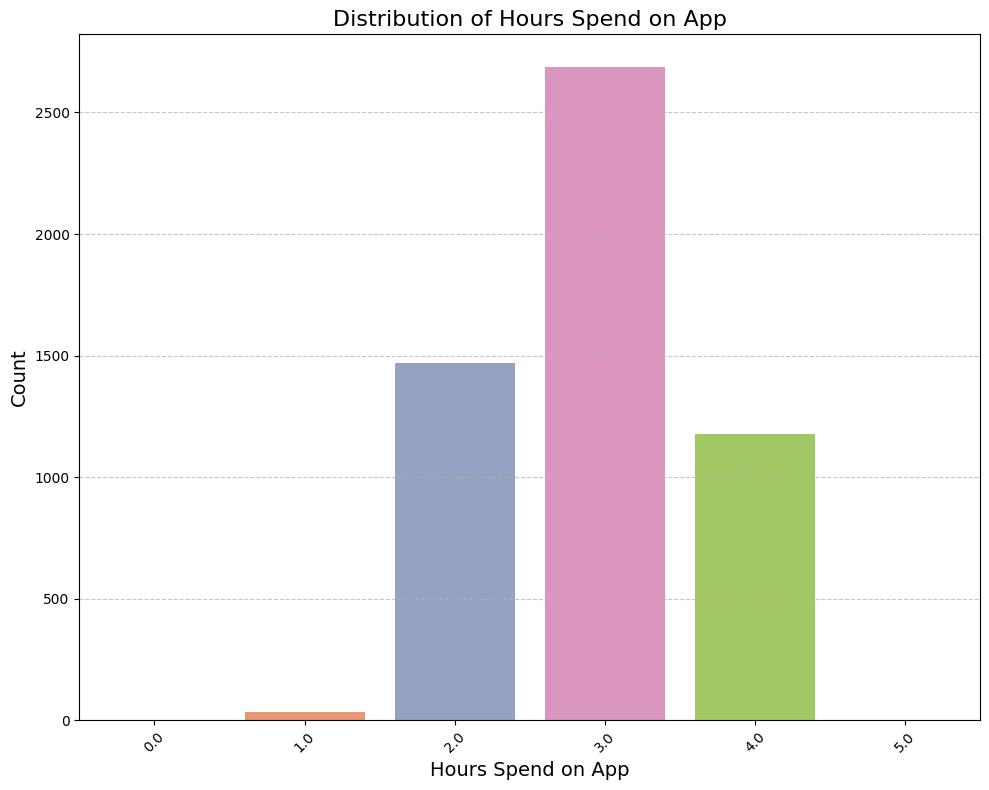

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data['HourSpendOnApp'], palette='Set2')
plt.xlabel('Hours Spend on App', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Hours Spend on App', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here as per the count plot and from the distribution.

Majority of Customers Spend Around 3 Hours on the App: Nearly 50% of customers spend approximately 3 hours on the app, indicating that this is the most common behavior among users.

Significant Proportion Spend 2 Hours: Around 27% of customers spend about 2 hours on the app, which is the second most common duration. This suggests that there is a considerable portion of users who engage with the app for a shorter period.

Fewer Customers Spend Longer Hours: A smaller percentage of customers spend 4 or 5 hours on the app, with approximately 22% and less than 1% respectively. This indicates that fewer users engage with the app for extended durations.

In [ ]:
data['HourSpendOnApp'].describe()

count    5375.000000
mean        2.931535
std         0.721926
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

<ipython-input-17-05a71f652f6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['HourSpendOnApp'])


Text(0, 0.5, 'Count')

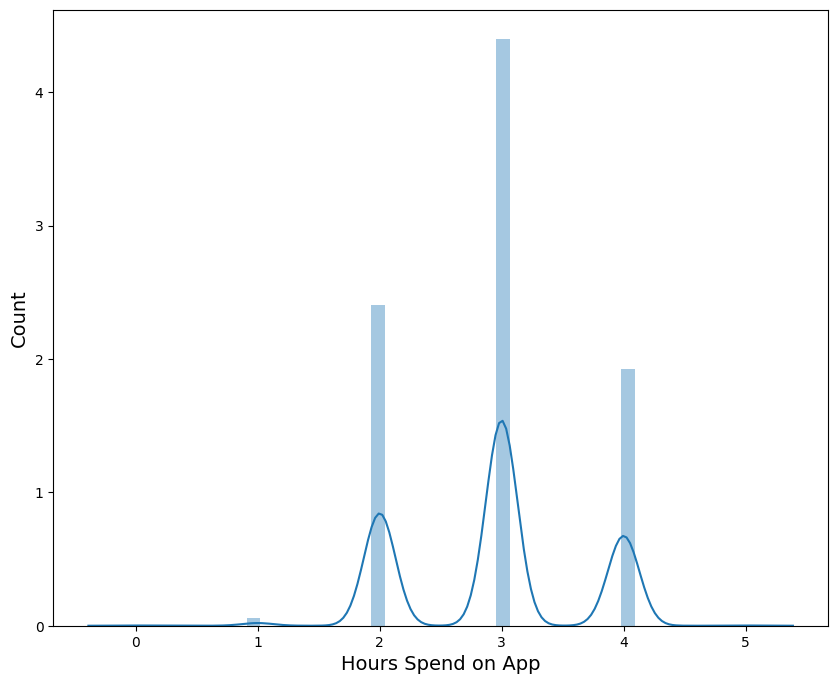

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(x=data['HourSpendOnApp'])
plt.xlabel('Hours Spend on App', fontsize=14)
plt.ylabel('Count', fontsize=14)

Churn vs Hours Spend On App

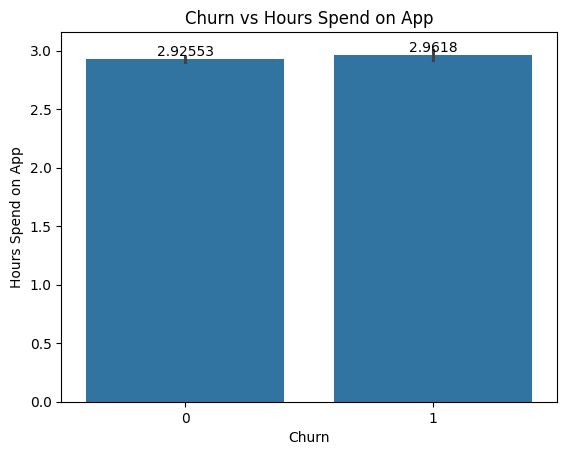

In [ ]:
#Barplot
sns.barplot(x='Churn', y='HourSpendOnApp', data=data)
plt.title('Churn vs Hours Spend on App')
plt.xlabel('Churn')
plt.ylabel('Hours Spend on App')
ax7=plt.gca()
ax7.bar_label(ax7.containers[0])
plt.show()

**HOURS SPEND ON APP VS GENDER**

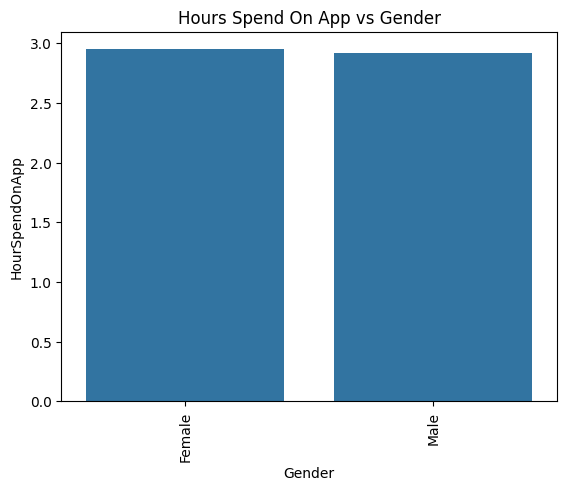

In [ ]:
nofd=data.groupby(['Gender'])['HourSpendOnApp'].mean().reset_index()
ax6=sns.barplot(data=nofd,x='Gender',y='HourSpendOnApp')
ax6.tick_params(axis='x', rotation=90)
ax6.set_title("Hours Spend On App vs Gender")
plt.show()


## **Number Of Device Registered**

In [ ]:
data['NumberOfDeviceRegistered']

0       3
1       4
2       4
3       4
4       3
       ..
5625    2
5626    5
5627    2
5628    5
5629    2
Name: NumberOfDeviceRegistered, Length: 5630, dtype: int64

In [ ]:
data['NumberOfDeviceRegistered'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5630 entries, 0 to 5629
Series name: NumberOfDeviceRegistered
Non-Null Count  Dtype
--------------  -----
5630 non-null   int64
dtypes: int64(1)
memory usage: 44.1 KB


In [ ]:
data['NumberOfDeviceRegistered'].describe()

count    5630.000000
mean        3.688988
std         1.023999
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfDeviceRegistered, dtype: float64

Mean is around 3 device connections with a maximum of 6 devices.

In [ ]:
data['NumberOfDeviceRegistered'].isna().sum()

0

In [ ]:
data['NumberOfDeviceRegistered'].value_counts(normalize=True)*100

NumberOfDeviceRegistered
4    42.220249
3    30.177620
5    15.648313
2     4.902309
1     4.174067
6     2.877442
Name: proportion, dtype: float64

Category 4: Approximately 42.22% of users fall into this category. This suggests that a significant portion of users have registered four devices.

Category 3: About 30.18% of users fall into this category. Users with three registered devices make up a substantial portion.

Category 5: Roughly 15.65% of users belong to this category. These users have five registered devices.

Category 2: Only 4.90% of users fall into this category. Users with two registered devices are relatively less common.

Category 1: Approximately 4.17% of users are in this category. Users with one registered device form a small group.

Category 6: The least common category, with only 2.88% of users. These users have six registered devices.

Overall, most users seem to have registered either three or four devices.

<ipython-input-30-3c6c112ae1ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['NumberOfDeviceRegistered'], palette='Set1')


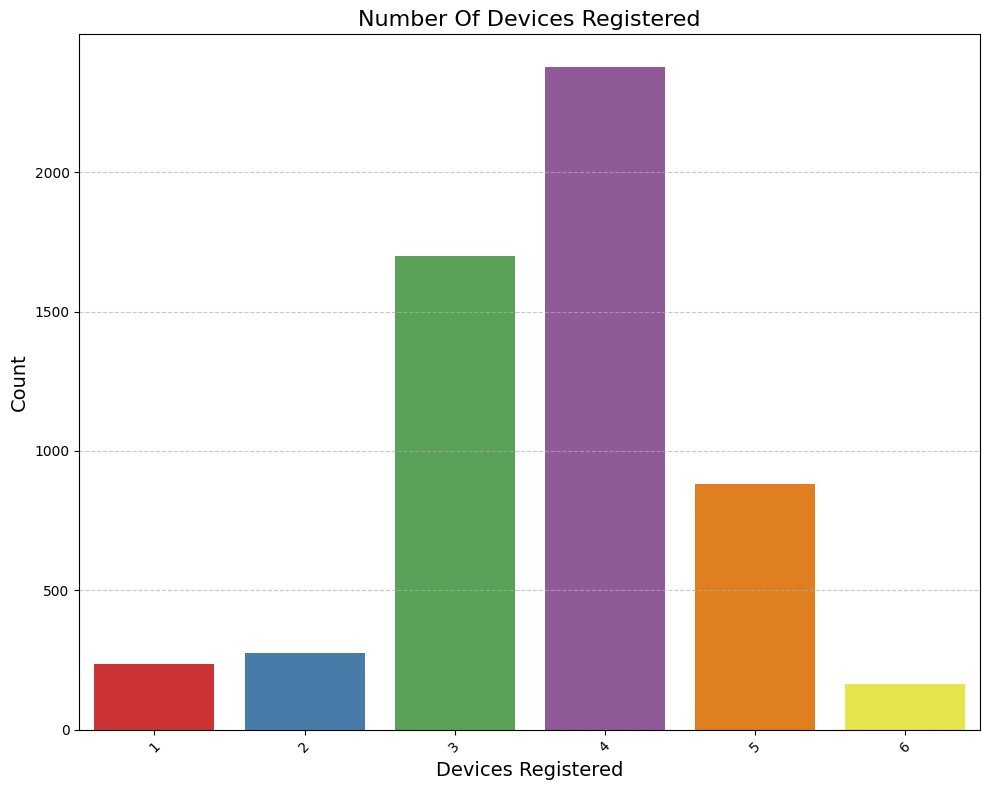

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data['NumberOfDeviceRegistered'], palette='Set1')
plt.xlabel('Devices Registered', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number Of Devices Registered', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The countplot graphically represents the same inferences from the valuecounts distribution.

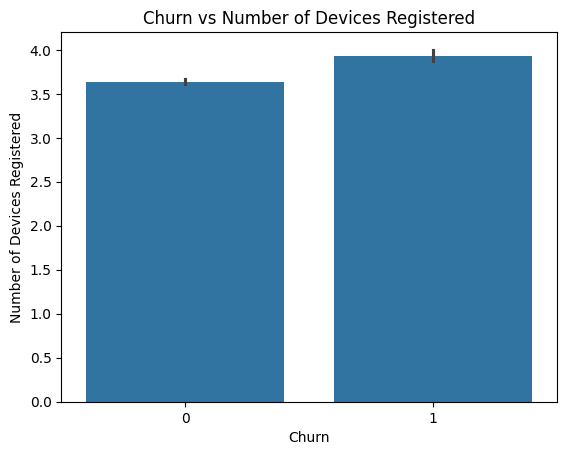

In [ ]:
# Bar Plot
sns.barplot(x='Churn', y='NumberOfDeviceRegistered', data=data)
plt.title('Churn vs Number of Devices Registered')
plt.xlabel('Churn')
plt.ylabel('Number of Devices Registered')
plt.show()

The Conclusion is People who have more number of devices registered have churned out more,which is also a slight difference.

## **Prefered Order Category**

In [17]:
data['PreferedOrderCat']=data['PreferedOrderCat'].replace('Mobile','Mobile Phone')
data['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

In [ ]:
data['PreferedOrderCat']

0       Laptop & Accessory
1             Mobile Phone
2             Mobile Phone
3       Laptop & Accessory
4             Mobile Phone
               ...        
5625    Laptop & Accessory
5626               Fashion
5627    Laptop & Accessory
5628    Laptop & Accessory
5629    Laptop & Accessory
Name: PreferedOrderCat, Length: 5630, dtype: object

In [ ]:
data['PreferedOrderCat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5630 entries, 0 to 5629
Series name: PreferedOrderCat
Non-Null Count  Dtype 
--------------  ----- 
5630 non-null   object
dtypes: object(1)
memory usage: 44.1+ KB


In [ ]:
data['PreferedOrderCat'].describe()

count             5630
unique               5
top       Mobile Phone
freq              2080
Name: PreferedOrderCat, dtype: object

In [ ]:
data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [ ]:
data['PreferedOrderCat'].isna().sum()

0

In [ ]:
data['PreferedOrderCat'].value_counts(normalize=True)*100

PreferedOrderCat
Mobile Phone          36.944938
Laptop & Accessory    36.412078
Fashion               14.671403
Grocery                7.282416
Others                 4.689165
Name: proportion, dtype: float64

LaptopAccessory: Approximately 36.41% of users prefer ordering laptop accessories.

MobilePhone: About 36.94% of users prefer ordering mobile phones. Mobile phones are the most popular choice.

Fashion: Roughly 14.67% of users prefer ordering fashion items. Fashion is a significant category but less common than laptops and mobile phones.

Grocery: Only 7.28% of users prefer ordering groceries. Grocery items are less popular compared to other categories.

Others: The least common category, with only 4.69% of users. This category likely includes diverse items not covered by the other categories. Overall, laptop accessories and mobile phones dominate user preferences.

<ipython-input-13-b7d683dbe614>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['PreferedOrderCat'], palette='Set1')


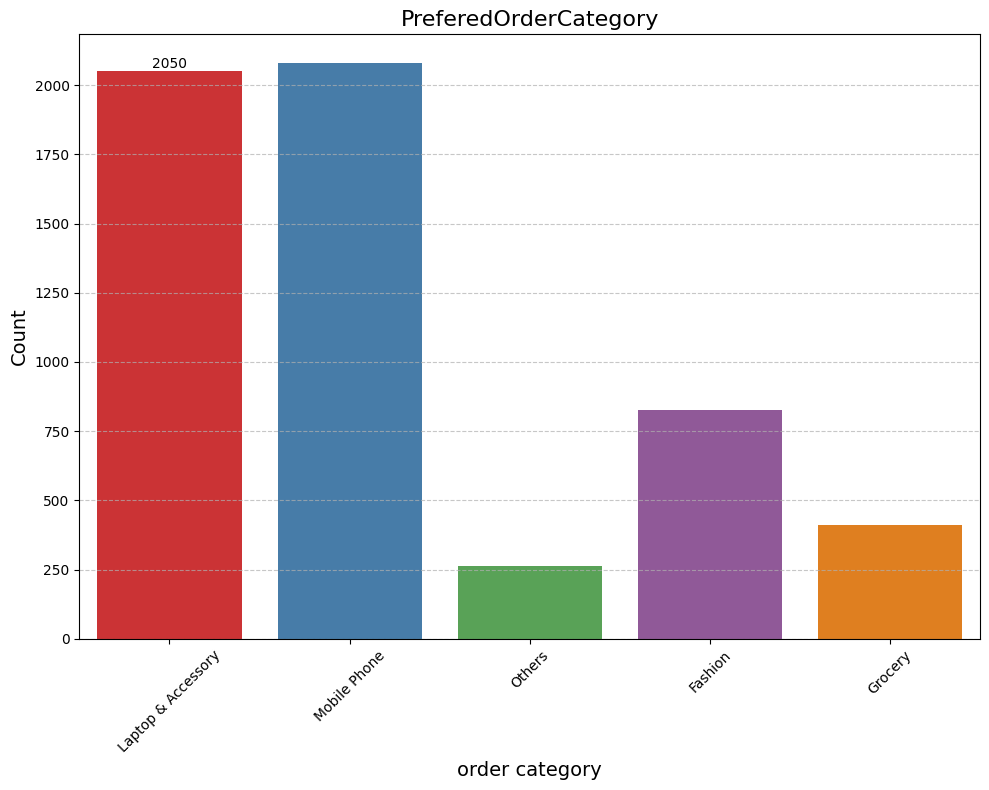

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data['PreferedOrderCat'], palette='Set1')
plt.xlabel('order category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('PreferedOrderCategory', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
pl=plt.gca()
pl.bar_label(pl.containers[0])
plt.tight_layout()
plt.show()

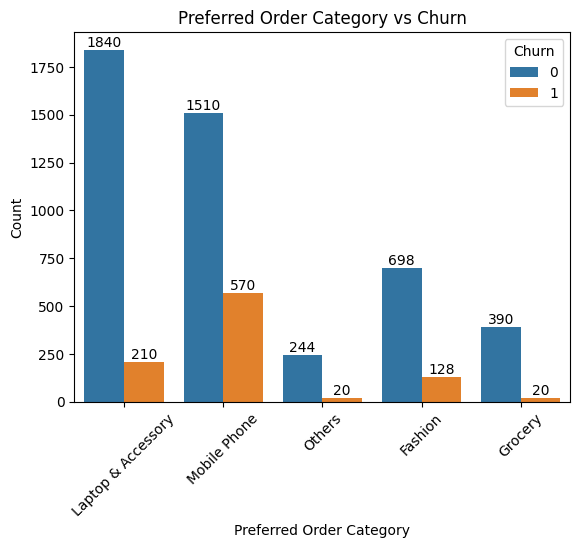

In [ ]:
sns.countplot(x='PreferedOrderCat', hue='Churn', data=data)
plt.title('Preferred Order Category vs Churn')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
pl1=plt.gca()
pl1.bar_label(pl1.containers[0])
pl1.bar_label(pl1.containers[1])
plt.xticks(rotation=45)
plt.show()

   Mobile Phones : This category might be the key area to focus on for customer retention strategies, as they have the highest number of users churned.

Average tenure period of Customers with Preferred Order catergory.

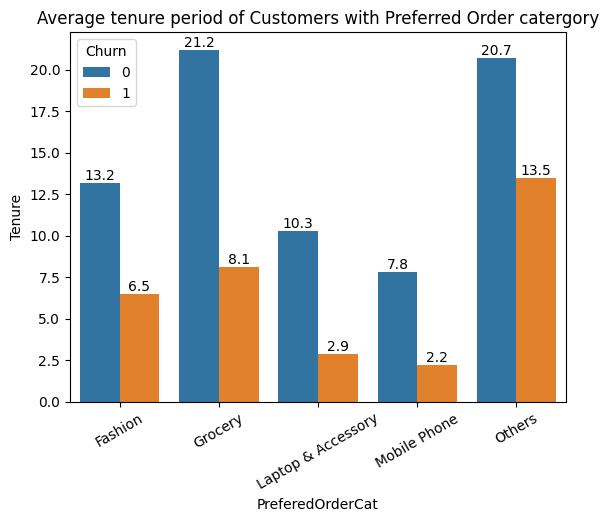

In [ ]:
Churn_tenure_cat=data.groupby(["Churn","PreferedOrderCat"])["Tenure"].mean().round(1).reset_index()

ax11=sns.barplot(y="Tenure",x="PreferedOrderCat",hue ='Churn', data=Churn_tenure_cat)
ax11.set_title("Average tenure period of Customers with Preferred Order catergory")
ax11.bar_label(ax11.containers[0])
ax11.bar_label(ax11.containers[1])
ax11.tick_params(axis='x', rotation=30)
plt.show()

The above graph signifies the average tenure period of customers with respect to their preffered order catergory.

The order catergory of Electronics items such as 'Laptop & Accessory', and 'Mobile Phone' shows a lower tenure count.

Why is there a lower tenure period with customers purchasing Electronic products?
1. Average cashback to Customers by Preferred Order catergory

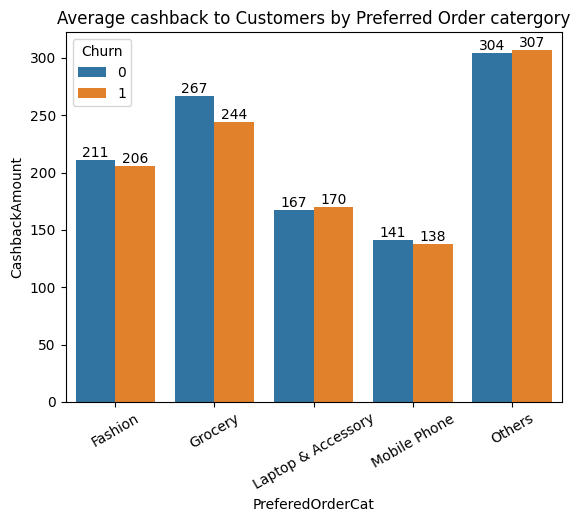

In [ ]:
Churn_cash_cat=data.groupby(["Churn","PreferedOrderCat"])["CashbackAmount"].mean().round(0).reset_index()

ax13=sns.barplot(y="CashbackAmount",x="PreferedOrderCat",hue ='Churn', data=Churn_cash_cat)
ax13.set_title("Average cashback to Customers by Preferred Order catergory")
ax13.bar_label(ax13.containers[0])
ax13.bar_label(ax13.containers[1])
ax13.tick_params(axis='x', rotation=30)
plt.show()

Reason: Lower cashback catergories shows lowered tenure period.
Conclusion: Higher average cashback on catergories leads to longer tenure period of customers.

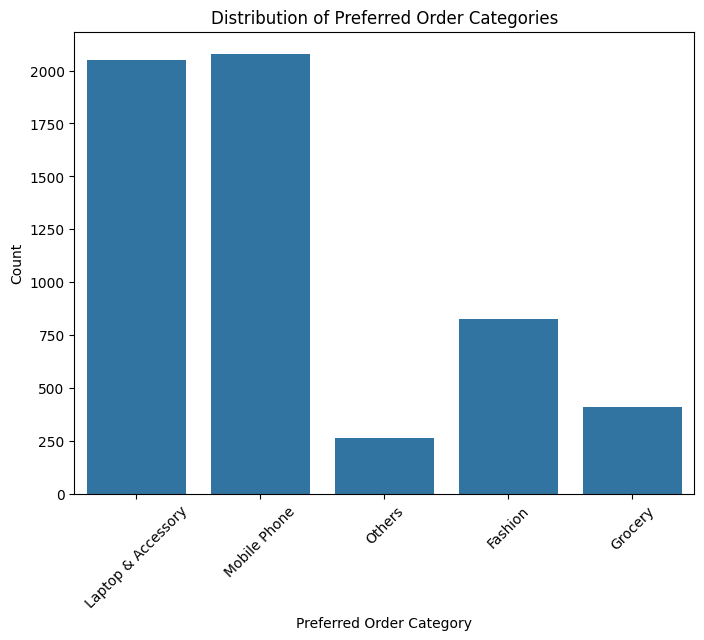

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='PreferedOrderCat')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.title('Distribution of Preferred Order Categories')
plt.xticks(rotation=45)
plt.show()

## **SATISFACTION SCORE**

In [ ]:
data['SatisfactionScore']

0       2
1       3
2       3
3       5
4       5
       ..
5625    1
5626    5
5627    4
5628    4
5629    3
Name: SatisfactionScore, Length: 5630, dtype: int64

In [ ]:
data['SatisfactionScore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5630 entries, 0 to 5629
Series name: SatisfactionScore
Non-Null Count  Dtype
--------------  -----
5630 non-null   int64
dtypes: int64(1)
memory usage: 44.1 KB


5630 non-null values with memory usage of 44 kb.

In [ ]:
data['SatisfactionScore'].describe()

count    5630.000000
mean        3.066785
std         1.380194
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: SatisfactionScore, dtype: float64

mean of SatisfactionScore is about 3 with a maximum value of 5.

In [ ]:
data['SatisfactionScore'].isna().sum()

0

In [ ]:
data['SatisfactionScore'].value_counts()

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

There are only 5 values with the most satisfaction score 3.

In [ ]:
data['SatisfactionScore'].value_counts(normalize=True)*100

SatisfactionScore
3    30.159858
1    20.674956
5    19.680284
4    19.076377
2    10.408526
Name: proportion, dtype: float64

<ipython-input-58-4e87cf2cfa59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['SatisfactionScore'], palette='Set1')


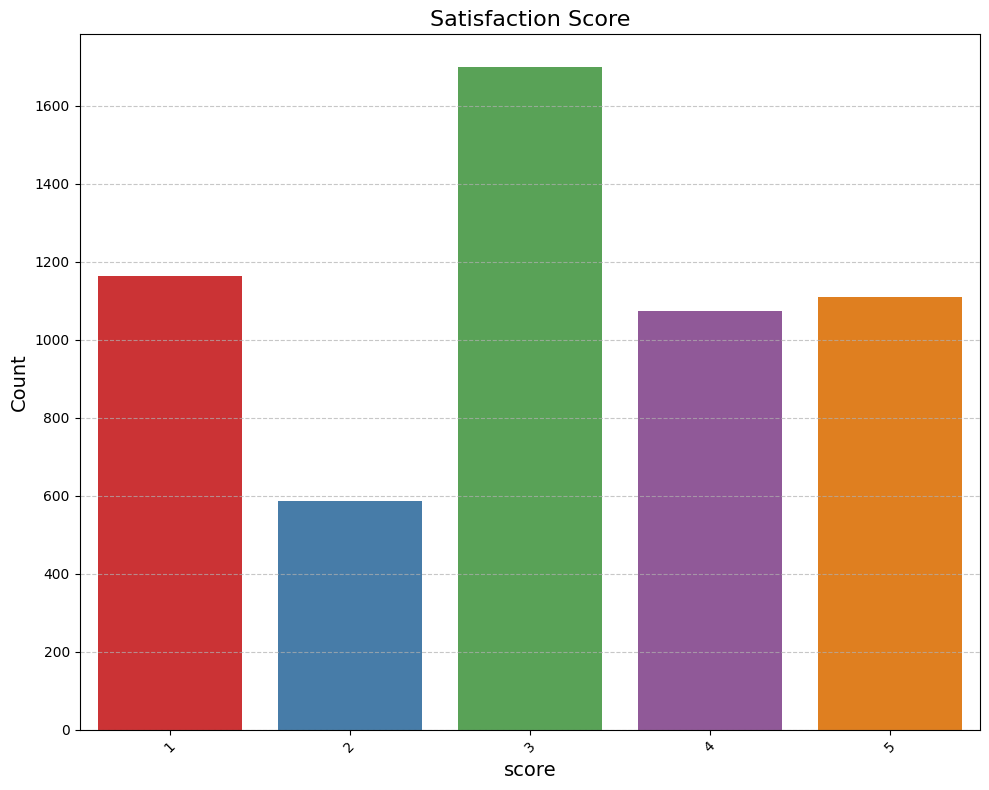

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data['SatisfactionScore'], palette='Set1')
plt.xlabel('score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Satisfaction Score', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Category 3: Approximately 30.16% of users fall into this category. Users with a satisfaction score of 3 represent the largest group.

Category 1: About 20.67% of users fall into this category. Users with a satisfaction score of 1 form a significant portion.

Category 5: Roughly 19.68% of users belong to this category. These users have a satisfaction score of 5.

Category 4: Approximately 19.08% of users are in this category. Users with a satisfaction score of 4 are similar in representation to category 5.

Category 2: Only 10.41% of users fall into this category. Users with a satisfaction score of 2 are the least common. Overall, most users seem to have moderate satisfaction scores (3 or 4).

<ipython-input-59-eb54b4180f7b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['SatisfactionScore'])


Text(0, 0.5, 'Count')

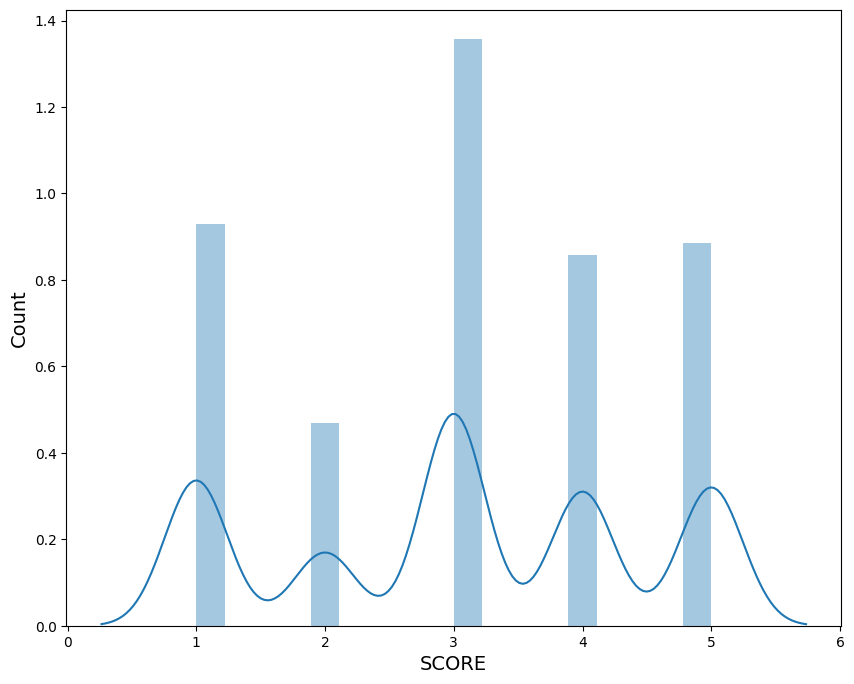

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(x=data['SatisfactionScore'])
plt.xlabel('SCORE', fontsize=14)
plt.ylabel('Count', fontsize=14)

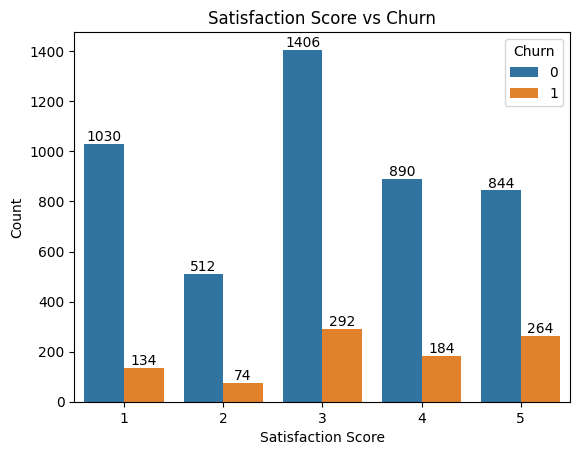

In [ ]:
sns.countplot(x='SatisfactionScore', hue='Churn', data=data)
plt.title('Satisfaction Score vs Churn')
plt.xlabel('Satisfaction Score')
pl4=plt.gca()
pl4.bar_label(pl4.containers[0])
pl4.bar_label(pl4.containers[1])
plt.ylabel('Count')
plt.show()

The Conclusion is that most people who churned came from those whose gave high satisfaction score.

## **Marital Status.**

### **Distribution of Martial Status column**

In [ ]:
data['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

### Married individuals form the largest customer segmentation.

### **Preferred order category by Marital Status.**

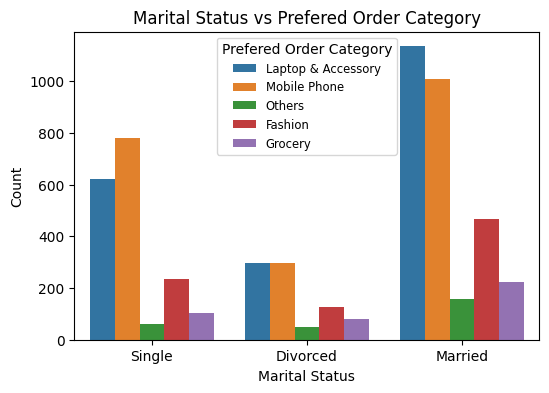

In [ ]:
 # Creating a clustered bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='MaritalStatus', hue='PreferedOrderCat')
plt.title('Marital Status vs Prefered Order Category')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Prefered Order Category',fontsize='small')
plt.show()


*  The categories for laptops & accessories, mobile phones, fashion,and groceries show consistent demand across marital statuses, with demand and purchase is the **highest among married customers**.

*   This also suggests that the **electronics** is the most demanded category.





### **Marital Status vs Churn.**

Text(0.5, 1.0, 'Churn count by Marital Status')

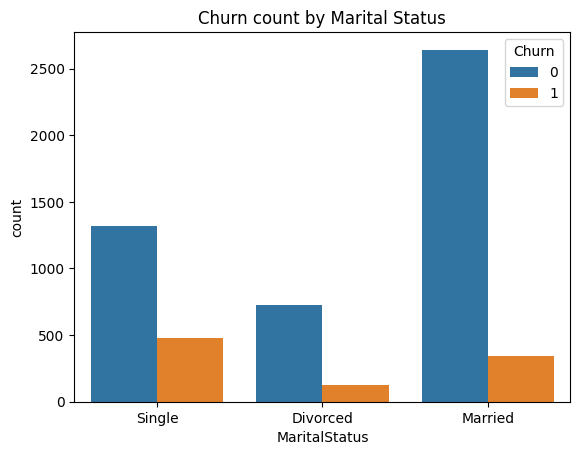

In [ ]:
sns.countplot(x='MaritalStatus',hue ='Churn', data=data )
plt.title('Churn count by Marital Status')

### **Inference:**

*   The plot reveals that singles are most likely to churn out.
*   Married customers showed the highest retention count.

 ### If the company focuses more on  the married and single customers by introducing specific strategies or offering a hike in cashback amount for them, it could help in retain these customer segments and overall reduce the churn count.

## **Number of Address.**

## **Univariate analysis on Number of Address.**

In [ ]:
data['NumberOfAddress'].unique()

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22])

Text(0, 0.5, 'Count')

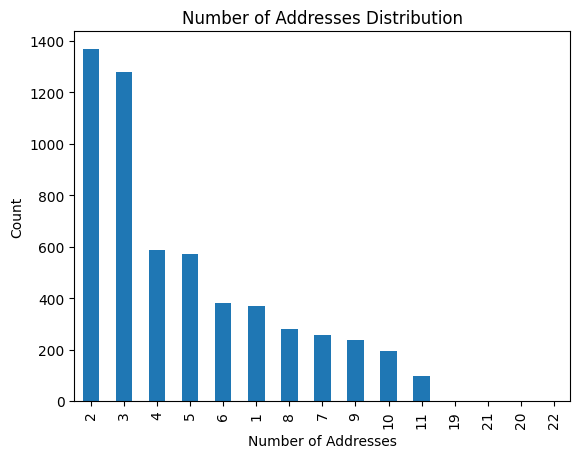

In [ ]:
data['NumberOfAddress'].value_counts().plot(kind ='bar')
plt.title('Number of Addresses Distribution')
plt.xlabel('Number of Addresses')
plt.ylabel('Count')

### **Half** of the customer segmentation consists of customers who have added a total of  **2 or 3 addresses** on the website.

## **Relation between Number of Addressess and City Tier.**

In [ ]:
data.groupby('CityTier')['NumberOfAddress'].value_counts()

CityTier  NumberOfAddress
1         2                  871
          3                  832
          4                  397
          5                  377
          6                  247
          1                  228
          8                  187
          7                  173
          9                  150
          10                 129
          11                  71
          22                   1
          21                   1
          20                   1
          19                   1
2         2                   61
          3                   43
          5                   30
          1                   23
          6                   21
          4                   16
          10                  13
          8                   10
          7                   10
          11                   9
          9                    6
3         2                  437
          3                  403
          4                  175
          5      

### **Tier 1&3 customers** tend to have more addresses added on the website than that customers from the lower tiers. Customers from city tier 2 is observed to have lowest number of addresses registered.

## **Addresses of Cutomers within each City Tiers VS Churn count.**

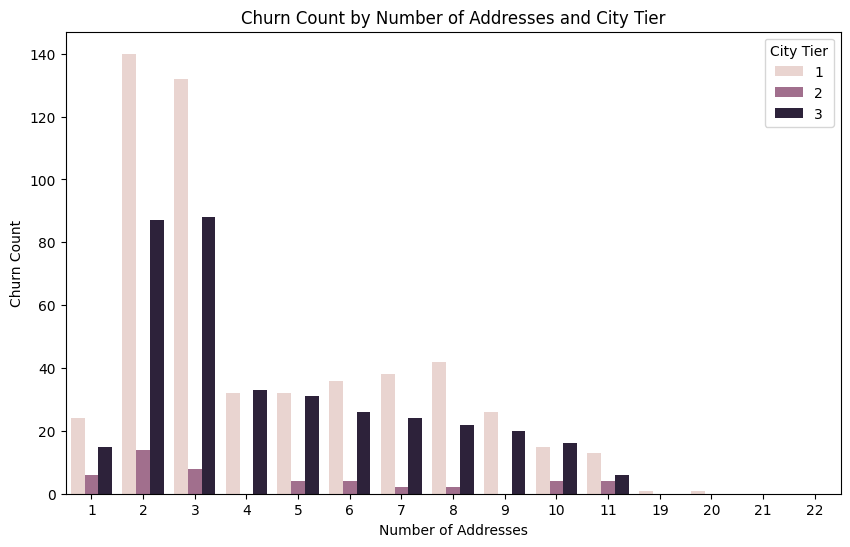

In [ ]:
# Grouping data by NumberOfAddress and CityTier and calculating churn count
churn_count = data.groupby(['NumberOfAddress', 'CityTier'])['Churn'].sum().reset_index()
## counts the no.of churn occurances within each group

plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfAddress', y='Churn', hue='CityTier', data=churn_count)

plt.xlabel('Number of Addresses')
plt.ylabel('Churn Count')
plt.title('Churn Count by Number of Addresses and City Tier')
plt.legend(title='City Tier')

In [ ]:
data['NumberOfAddress'].value_counts()

### **Inference:**
*   There are customers who have added multiple addresses on the website, and they seem to be retained by the company, indicating that they are regular customers.
*   Those with 2 or 3 addresses added on the website are observed to be most likely to churn, with the majority belonging to city tiers 1 and 3. This suggests that these are short-term customers or those who do not frequently use the company's website.

### The company should introduce new coupons or offer special promotions to these users inorder to increase customer retention.





## **Complain.**


In [ ]:
data['Complain'].unique()

array([1, 0])

In [ ]:
data['Complain'].value_counts()

Complain
0    4026
1    1604
Name: count, dtype: int64

(-1.0999983585388011,
 1.0999992658635092,
 -1.0999999853396911,
 1.0999999922772257)

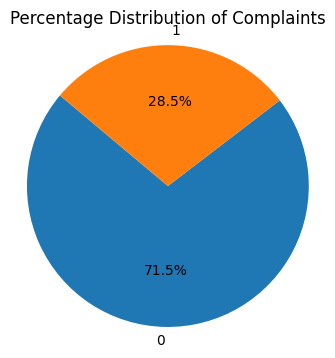

In [ ]:
complain_counts = data['Complain'].value_counts()

# Calculate the percentage
complain_percentage = (complain_counts / complain_counts.sum()) * 100

# Creating the pie chart
plt.figure(figsize=(4, 4))
plt.pie(complain_percentage, labels=complain_percentage.index, autopct='%1.1f%%', startangle=140)

plt.title('Percentage Distribution of Complaints')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

## **Customers Complain effect on Churn.**

In [ ]:
data.groupby('Complain')['Churn'].value_counts().unstack(fill_value=0)

Churn        0    1
Complain           
0         3586  440
1         1096  508

In [ ]:
data.groupby('Complain')['Churn'].value_counts(normalize=True).unstack(fill_value=0) * 100

Churn             0          1
Complain                      
0         89.071038  10.928962
1         68.329177  31.670823

### **89%** of people have not made any complaints. Also it is observed that among the customers who complained, only **31%**  churned, while the rest remained with the company. This suggests that the number of complaints raised doesn't significantly affected the churn.

## **Gender Vs City Tier Vs Complain.**

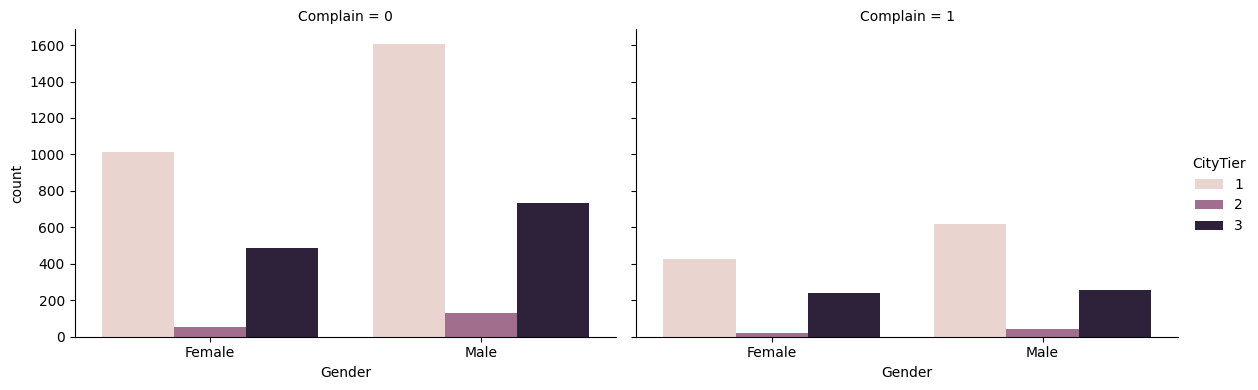

In [ ]:
# Each plot will represent the count of customers based on their gender and complaint status within each city tier.
sns.catplot(x='Gender', hue='CityTier', col='Complain', kind='count', data=data,height=4, aspect=1.5)

### The customers from city tier 1 have lodged the most complaints, with **male customers** being the dominant group, followed by those in tier 3. Same is the case with people who have not complained, whose counts exceeds the ones who have lodged complaints.

### **Inference:**

*   Though some people complained, it is understood that the company took necessary steps to resolve the issues; otherwise, **68%** of the complaining customers would have churned away.
*   Since most of the complaining customers are from city tiers 1 & 3, more focus should be placed on delivering their products smoothly.



## **Order Hike From Last Year.**




## **The average increase in order amounts across different categories and city tiers.**

<Figure size 600x400 with 0 Axes>

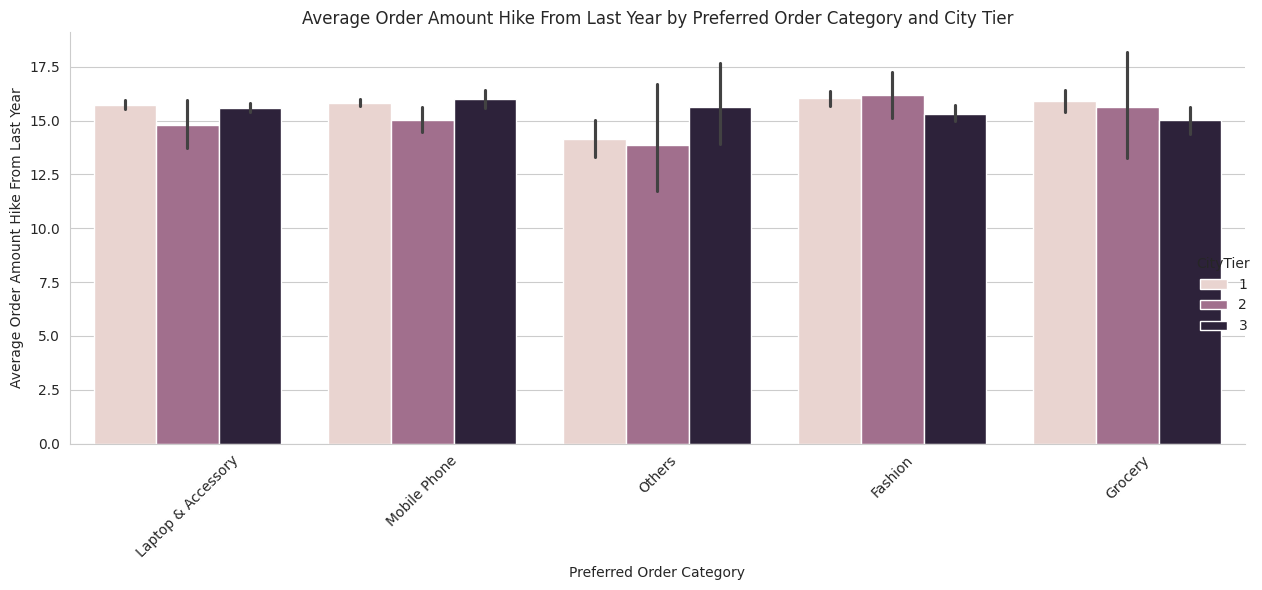

In [ ]:
sns.set_style("whitegrid")

# Creatin a bar plot
plt.figure(figsize=(6, 4))
sns.catplot(x='PreferedOrderCat', y='OrderAmountHikeFromlastYear', hue='CityTier', data=data, kind='bar', height=6, aspect=2)

# Set the title and labels
plt.title('Average Order Amount Hike From Last Year by Preferred Order Category and City Tier')
plt.xlabel('Preferred Order Category')
plt.ylabel('Average Order Amount Hike From Last Year')

# Adjust the plot layout
plt.xticks(rotation=45)
plt.tight_layout()


*   For City Tier 1: The Mobile phones and fashion categories seems to have a hike in purchase, closely followed by the grocery category.
*   For City Tier 2: Fashion items have had the most demand.
*   For City tier 3: Demand for items in every category items has increased, with a significant rise in purchases is seen in the mobile phone category.





### **Churn% for the Average Increase in Order Amounts across Different Categories.**

     PreferedOrderCat  AvgOrderAmountHike  TotalCount  ChurnCount  \
0             Fashion           15.771186         826         128   
1             Grocery           15.600601         410          20   
2  Laptop & Accessory           15.651220        2050         210   
3        Mobile Phone           15.800962        2080         570   
4              Others           14.473684         264          20   

   ChurnPercentage  
0        15.496368  
1         4.878049  
2        10.243902  
3        27.403846  
4         7.575758  


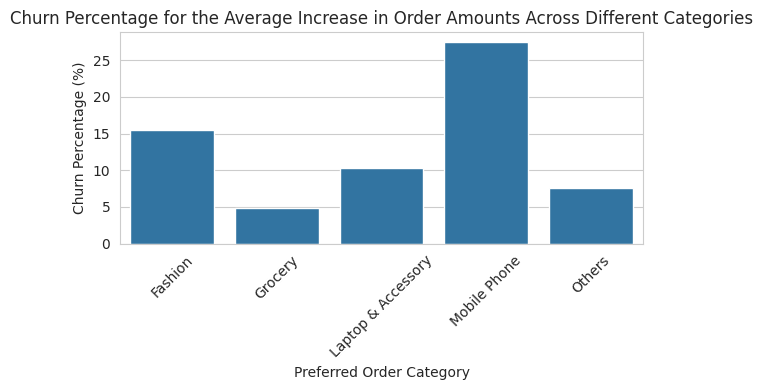

In [ ]:
# Grouping by 'PreferedOrderCat' and calculate the mean and churn count
grouped_data = data.groupby(['PreferedOrderCat']).agg(
    AvgOrderAmountHike=('OrderAmountHikeFromlastYear', 'mean'),
    TotalCount=('Churn', 'size'), # Counts the total number of rows in each group.
    ChurnCount=('Churn', 'sum') # Sums up the Churn column to get the total count of churns in each group.
).reset_index()

# Calculating the churn percentage
grouped_data['ChurnPercentage'] = (grouped_data['ChurnCount'] / grouped_data['TotalCount']) * 100

print(grouped_data)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='PreferedOrderCat', y='ChurnPercentage', data=grouped_data)

plt.title('Churn Percentage for the Average Increase in Order Amounts Across Different Categories')
plt.xlabel('Preferred Order Category')
plt.ylabel('Churn Percentage (%)')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Though the average order hike is high for mobile phones,it is observed to have the highest churn%.

### **Inference:**
*   There is demand for items in every category among Tier 3 customers.
*   The most hike in order is seen for the mobile phones.
*   The highest churn is observed for phone customers than others so this should be taken to account.



## **Analysis on the column 'Couponused'**

In [ ]:
data['CouponUsed'].sum()

9410.0

In [ ]:
data['CouponUsed'].sum()
data_df = pd.DataFrame(data)
data_df.groupby('Churn')['CouponUsed'].sum()

Churn
0    7796.0
1    1614.0
Name: CouponUsed, dtype: float64

Text(0, 0.5, 'Number of customers')

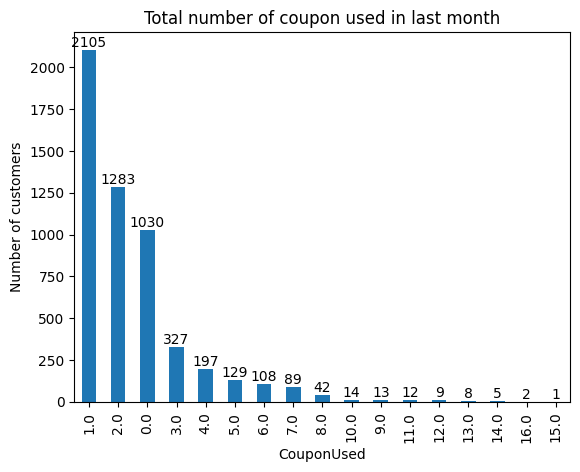

In [ ]:
Coupon_Usedcount=data["CouponUsed"].value_counts().plot(kind='bar')
Coupon_Usedcount.bar_label(Coupon_Usedcount.containers[0])
Coupon_Usedcount.set_title("Total number of coupon used in last month")
plt.ylabel('Number of customers')

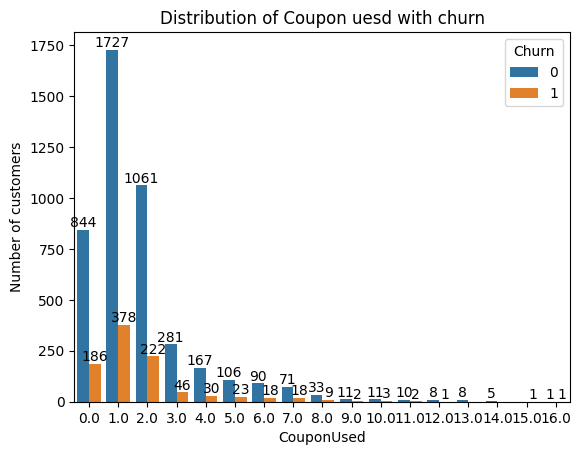

In [ ]:
couponused_churn=sns.countplot(x=data['CouponUsed'], hue=data['Churn'])
couponused_churn.bar_label(couponused_churn.containers[0])
couponused_churn.bar_label(couponused_churn.containers[1])
plt.title("Distribution of Coupon uesd with churn")
plt.ylabel('Number of customers')
plt.show()

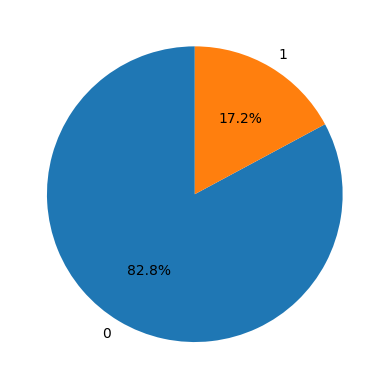

In [ ]:
result1 = data_df.groupby('Churn')['CouponUsed'].sum()
plt.pie(result1, labels=result1.index, autopct='%1.1f%%',startangle=90,)
plt.show()

1. Values in the column ranges from 0 to 16.

2. Total number of coupons used by the customers in the last month is 9410.

3. 78.47% of customers uses upto a maximum 3 number of coupons.

4. only 13% of customers who used coupon churn out


## **Analysis on the column 'OrderCount'**

In [ ]:
data['OrderCount'].sum()

16159.0

In [ ]:
data_df = pd.DataFrame(data)
data_df.groupby('Churn')['OrderCount'].sum()

Churn
0    13533.0
1     2626.0
Name: OrderCount, dtype: float64

Text(0, 0.5, 'Number of customers')

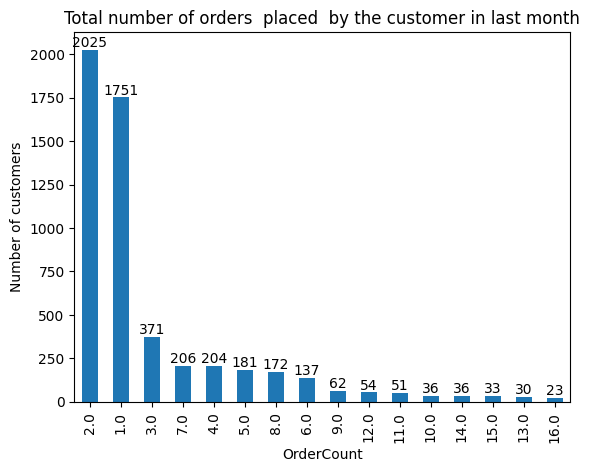

In [ ]:
order_count=data["OrderCount"].value_counts().plot(kind='bar')
order_count.bar_label(order_count.containers[0])
order_count.set_title("Total number of orders  placed  by the customer in last month")
plt.ylabel('Number of customers')

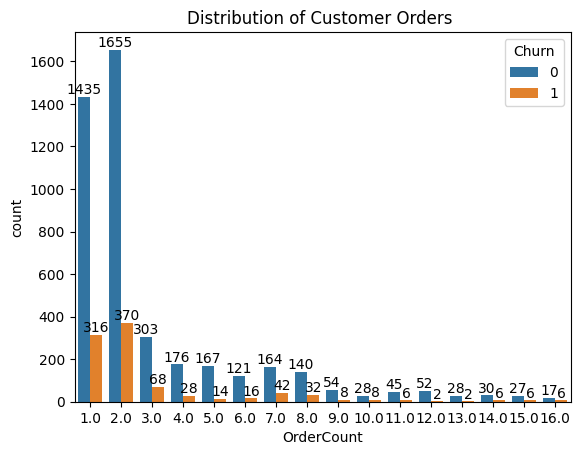

In [ ]:
ordercount_churn=sns.countplot(x=data['OrderCount'], hue=data['Churn'])
ordercount_churn.bar_label(ordercount_churn.containers[0])
ordercount_churn.bar_label(ordercount_churn.containers[1])
plt.title("Distribution of Customer Orders ")
plt.show()

**Order count value ranges from 1 to 16. The customers who churned the most only ordered 2 or 3 times.**

## **Analysis on the column 'Day Since Last order'**

Text(0, 0.5, 'Number of customers')

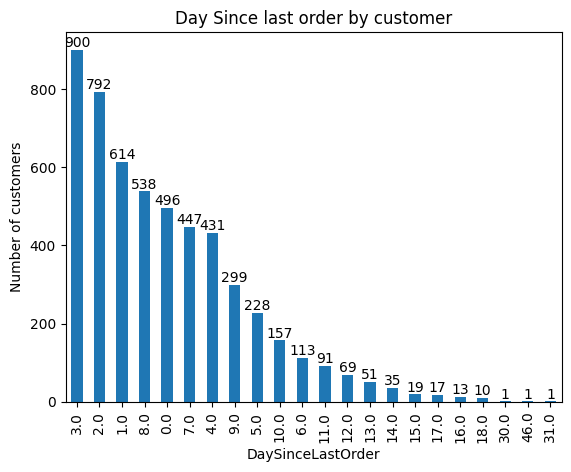

In [ ]:
day_last=data["DaySinceLastOrder"].value_counts().plot(kind='bar')
day_last.bar_label(day_last.containers[0])
day_last.set_title("Day Since last order by customer")
plt.ylabel('Number of customers')

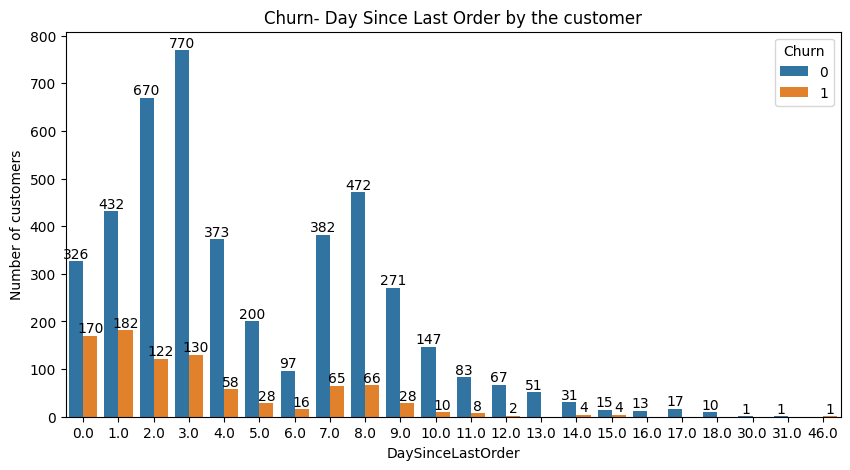

In [ ]:
plt.figure(figsize=(10,5))
day_since=sns.countplot(x=data['DaySinceLastOrder'], hue=data['Churn'])
day_since.bar_label(day_since.containers[0])
day_since.bar_label(day_since.containers[1])
plt.title('Churn- Day Since Last Order by the customer')
plt.ylabel('Number of customers')
plt.show()


**We notice churned customers leave the company after a week since their last order.**

## **Analysis on the column 'CashbackAmount'**

In [ ]:
max_value = data_df['CashbackAmount'].max()
print(max_value)

324.99


In [ ]:
cashback_customers=pd.DataFrame(data)
cashback_customers = cashback_customers['CashbackAmount'] > 0
cashback_customers.value_counts()

CashbackAmount
True     5626
False       4
Name: count, dtype: int64

In [ ]:
correlation1 = data["CashbackAmount"].corr(data["CouponUsed"])
print(f"Correlation between cash back and coupon used: {correlation1}")
correlation2 = data["CashbackAmount"].corr(data["OrderCount"])
print(f"Correlation between cash back and order count used: {correlation2}")

Correlation between cash back and coupon used: 0.286727936602581
Correlation between cash back and order count used: 0.3609836607590107


Churn
0    4678
1     948
dtype: int64


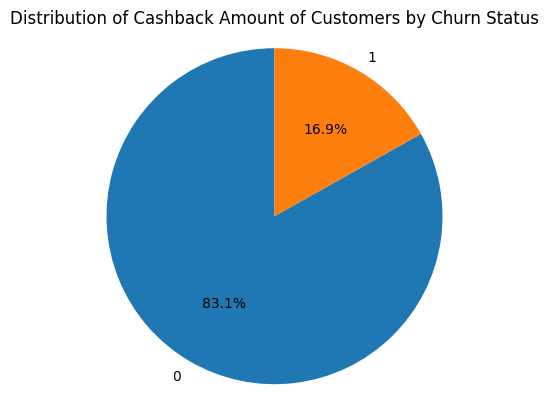

In [ ]:
data_df = pd.DataFrame(data)

# Filter rows where CashbackAmount is greater than 0
filtered_data = data_df[data_df['CashbackAmount'] > 0]

# Group by churn status
distinct_count = filtered_data.groupby('Churn').size()
print (distinct_count)

# Plotting the pie chart
plt.pie(distinct_count, labels=distinct_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribution of Cashback Amount of Customers by Churn Status")
plt.show()

1. Out of 5630 customers, 5626 people were eligible for cash back amount.

2. Among those 5626, - 83.1% of customers stay back with the company and - 16.9% churn out.Those 4 , they also stay back.

3.It is inferred that there is a low correlation value between coupon used & number of order count with the cash back amount.

In [ ]:
bins = [0, 50, 100, 200, 300, 400]

# Filter rows where CashbackAmount is greater than 0
filtered_data = data[data['CashbackAmount'] > 0]

# Group by churn status
distinct_count = filtered_data.groupby('Churn').size()
print(distinct_count)

# Creating a new DataFrame for filtered_data
filtered_data_df = pd.DataFrame(filtered_data)

# Creating the cash_back_category column using pd.cut
filtered_data_df["cash_back_category"] = pd.cut(filtered_data_df['CashbackAmount'], bins)
customer_count_by_category = filtered_data_df["cash_back_category"].value_counts()

# Use get() method with a default value to avoid KeyError
customers_0_to_50 = customer_count_by_category.get(pd.Interval(0, 50, closed='right'), 0)
customers_50_to_100 = customer_count_by_category.get(pd.Interval(50, 100, closed='right'), 0)
customers_100_to_200 = customer_count_by_category.get(pd.Interval(100, 200, closed='right'), 0)
customers_200_to_300 = customer_count_by_category.get(pd.Interval(200, 300, closed='right'), 0)
customers_300_to_400 = customer_count_by_category.get(pd.Interval(300, 400, closed='right'),0)
print(f"Customers with cash back amount 0 : 4")

print(f"Customers with cash back between 1 and 50: {customers_0_to_50}")
print(f"Customers with cash back between 50 and 100: {customers_50_to_100}")
print(f"Customers with cash back between 100 and 200: {customers_100_to_200}")
print(f"Customers with cash back between 200 and 300: {customers_200_to_300}")
print(f"Customers with cash back between 300 and 400: {customers_300_to_400}")


Churn
0    4678
1     948
dtype: int64
Customers with cash back amount 0 : 4
Customers with cash back between 1 and 50: 6
Customers with cash back between 50 and 100: 2
Customers with cash back between 100 and 200: 4295
Customers with cash back between 200 and 300: 1167
Customers with cash back between 300 and 400: 156


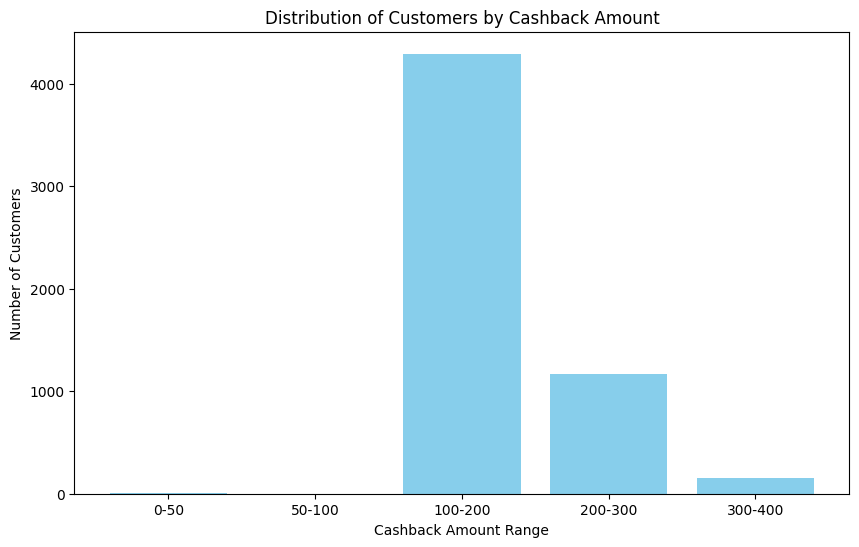

In [ ]:
cashback_categories = ['0-50', '50-100', '100-200', '200-300', '300-400']
customer_counts = [
    customers_0_to_50,
    customers_50_to_100,
    customers_100_to_200,
    customers_200_to_300,
    customers_300_to_400
]
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(cashback_categories, customer_counts, color='skyblue')
plt.title('Distribution of Customers by Cashback Amount')
plt.xlabel('Cashback Amount Range')
plt.ylabel('Number of Customers')
plt.show()

## **Coupon used & order count**

Correlation between cash back and coupon used: 0.7452446933125346


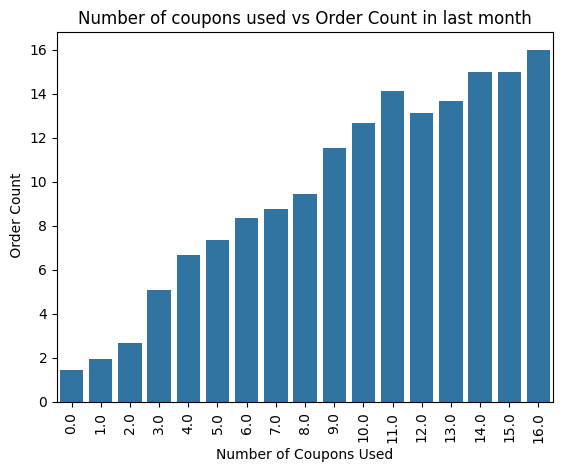

In [ ]:
correlation4 = data["OrderCount"].corr(data["CouponUsed"])

# Print the correlation coefficient
print(f"Correlation between cash back and coupon used: {correlation4}")
coupon1 = data.groupby(["CouponUsed"])['OrderCount'].mean().reset_index()

  # Creating the bar plot
ax = sns.barplot(data=coupon1, x='CouponUsed', y='OrderCount')
ax.set_xlabel("Number of Coupons Used")
ax.set_ylabel(" Order Count")
ax.set_title("Number of coupons used vs Order Count in last month")
plt.xticks(rotation=90)
plt.show()

**As the number of coupons used increases, the order count tends to increase significantly, and vice versa. This means that customers who use more coupons tend to place more orders, and vice versa.**

## **Churn rate by Preferred Login Device vs Average tenure period.**

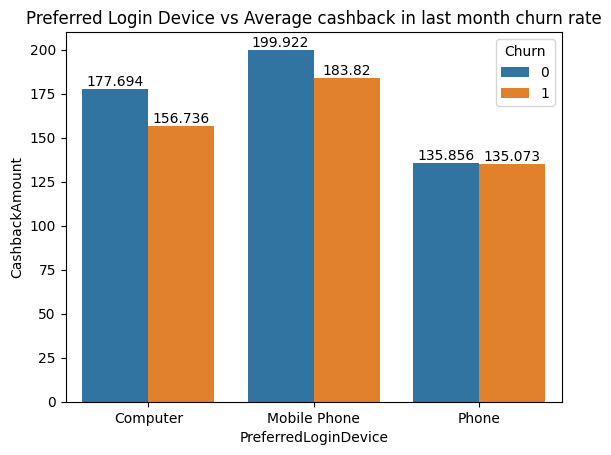

In [ ]:
Cash_pref=data.groupby(["PreferredLoginDevice","Churn"])['CashbackAmount'].mean().reset_index()
ax9=sns.barplot(data=Cash_pref,x='PreferredLoginDevice',y='CashbackAmount',hue="Churn")
ax9.set_title("Preferred Login Device vs Average cashback in last month churn rate")
ax9.bar_label(ax9.containers[0])
ax9.bar_label(ax9.containers[1])
plt.show()

 ## **Daysince last order & order count**

Correlation between cash back and coupon used: 0.49792849608613454


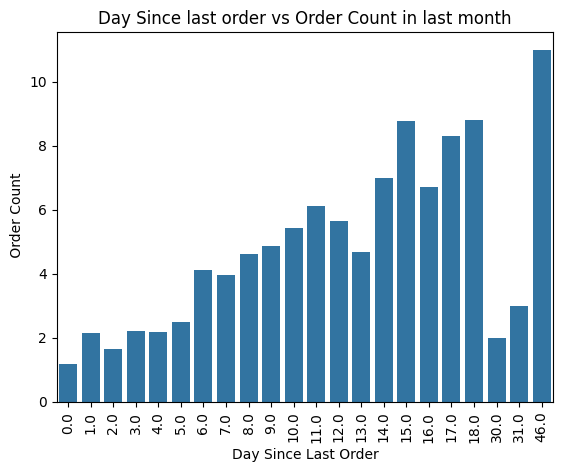

In [ ]:
correlation5  = data["OrderCount"].corr(data["DaySinceLastOrder"])

# Print the correlation coefficient
print(f"Correlation between cash back and coupon used: {correlation5}")
coupon2 = data.groupby(["DaySinceLastOrder"])['OrderCount'].mean().reset_index()

# Creating the bar plot
ax = sns.barplot(data=coupon2, x='DaySinceLastOrder', y='OrderCount')
ax.set_xlabel("Day Since Last Order")
ax.set_ylabel(" Order Count")
ax.set_title("Day Since last order vs Order Count in last month")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

#### **As the number of days since the last order increases, the order count tends to increase moderately, and vice versa. This means that there is a tendency for customers who have not placed an order in a while to place more orders when they do**.

# **Week 3: Data Pre-Processing.**

## **Handling Missing Values.**

In [ ]:
# Looking for missing values
for col in data.columns:
    print('{} - missing Values: {}'.format(col, data[col].isnull().sum()))

CustomerID - missing Values: 0
Churn - missing Values: 0
Tenure - missing Values: 264
PreferredLoginDevice - missing Values: 0
CityTier - missing Values: 0
WarehouseToHome - missing Values: 251
PreferredPaymentMode - missing Values: 0
Gender - missing Values: 0
HourSpendOnApp - missing Values: 255
NumberOfDeviceRegistered - missing Values: 0
PreferedOrderCat - missing Values: 0
SatisfactionScore - missing Values: 0
MaritalStatus - missing Values: 0
NumberOfAddress - missing Values: 0
Complain - missing Values: 0
OrderAmountHikeFromlastYear - missing Values: 265
CouponUsed - missing Values: 256
OrderCount - missing Values: 258
DaySinceLastOrder - missing Values: 307
CashbackAmount - missing Values: 0


### **Skewness**

In [ ]:
col=["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder"]
for columns in col:
  print(columns,"-",round(data[columns].skew(),2))

Tenure - 0.74
WarehouseToHome - 1.62
HourSpendOnApp - -0.03
OrderAmountHikeFromlastYear - 0.79
CouponUsed - 2.55
OrderCount - 2.2
DaySinceLastOrder - 1.19


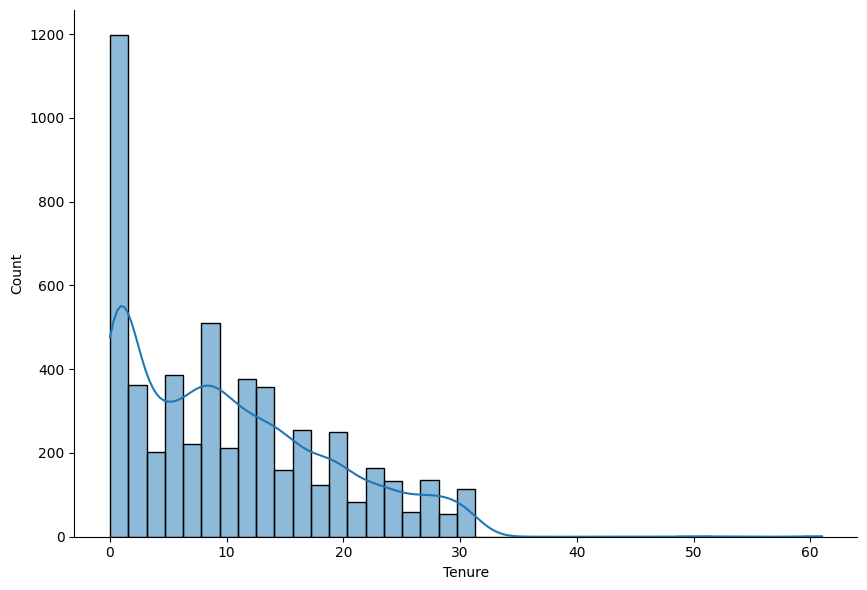

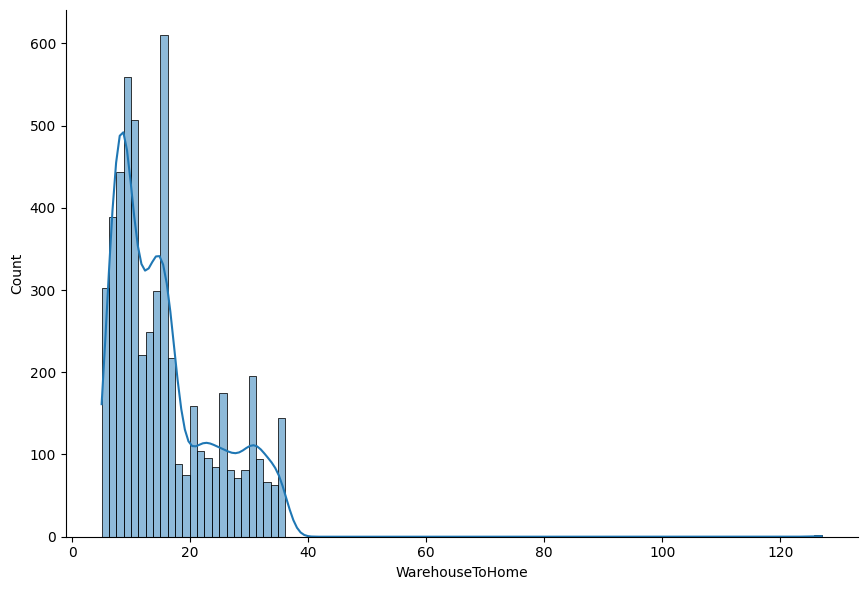

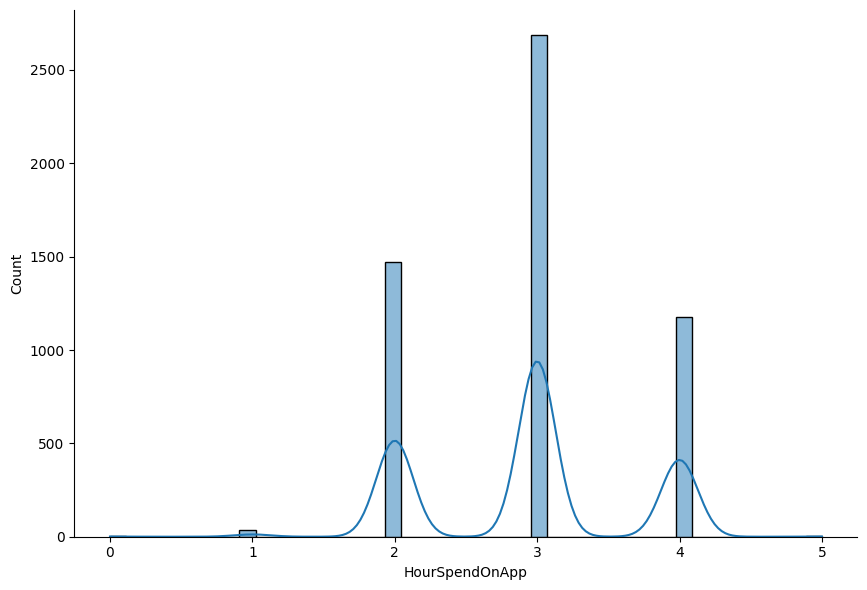

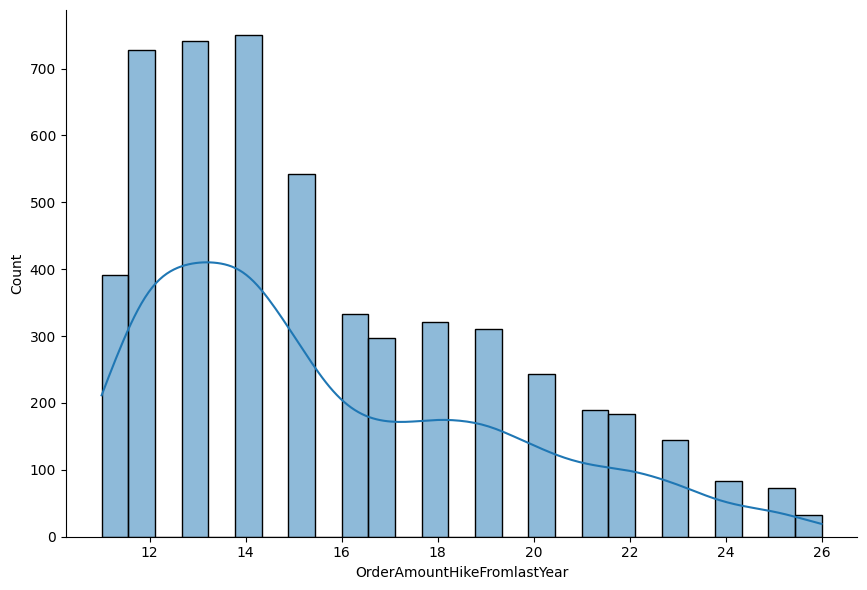

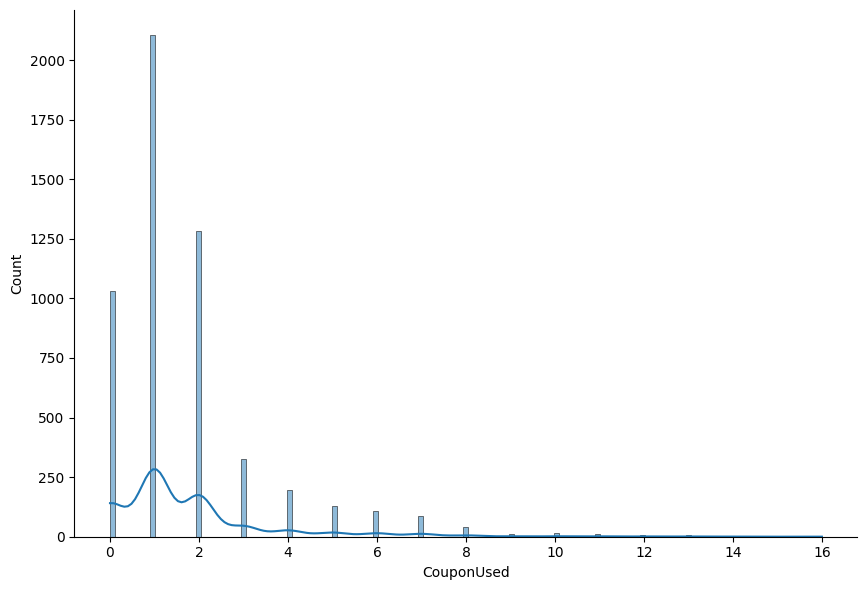

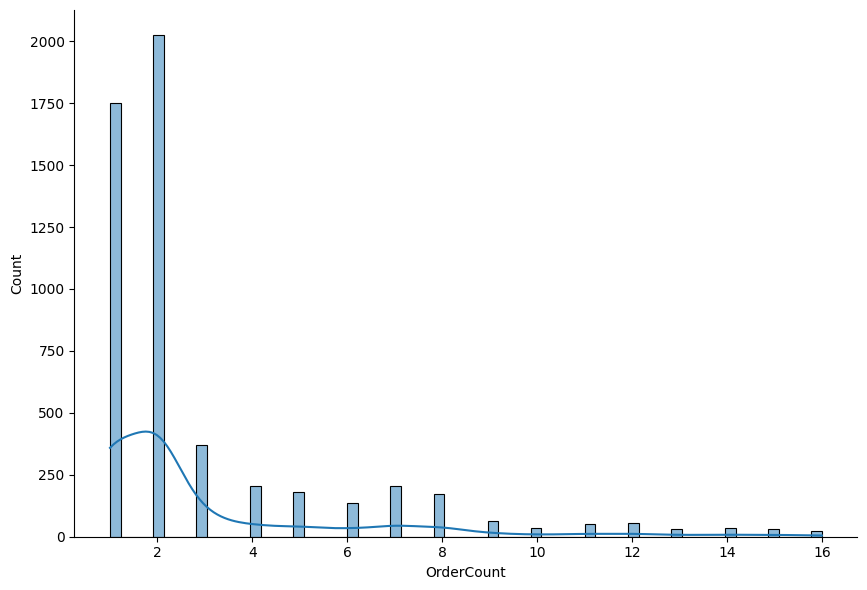

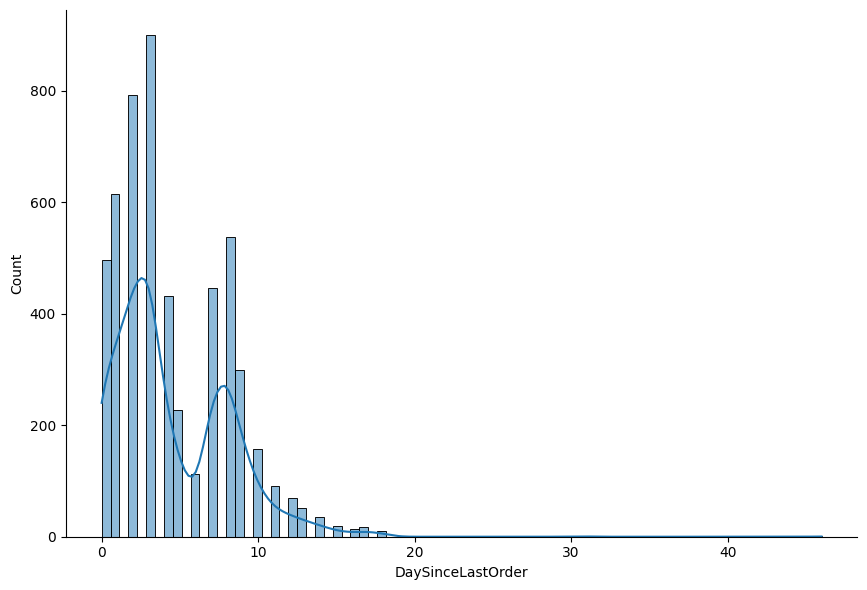

In [ ]:
for columns in col:
  sns.displot(data=data, x=columns, kde=True,height=6, aspect=11.7/8)

#### Skewness Graph
The given distribution plots indicate the skewness or distribution of feature that contain missing values. The inferences taken from the  graph are:
* Only Hour Spend On App column has a normal distribution with a skewness of **-0.03**, since the missing values should be imputed using mean value.
* All the other columns are highly right skewed and should be imputed using the median value


### **Missing value Imputation**

#### Simple Mean imputation

In [ ]:
data['HourSpendOnApp'].fillna(round(data['HourSpendOnApp'].mean(),0), inplace = True)
data['HourSpendOnApp'].unique()

array([3., 2., 1., 0., 4., 5.])

#### Median imputation

In [ ]:
col1=["Tenure","WarehouseToHome","OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder"]
for column in col1:
  data[column].fillna(data[column].median(), inplace = True)

In [ ]:
data.isna().sum().sum()

0

### **Reassessing Skewness After Imputation.**

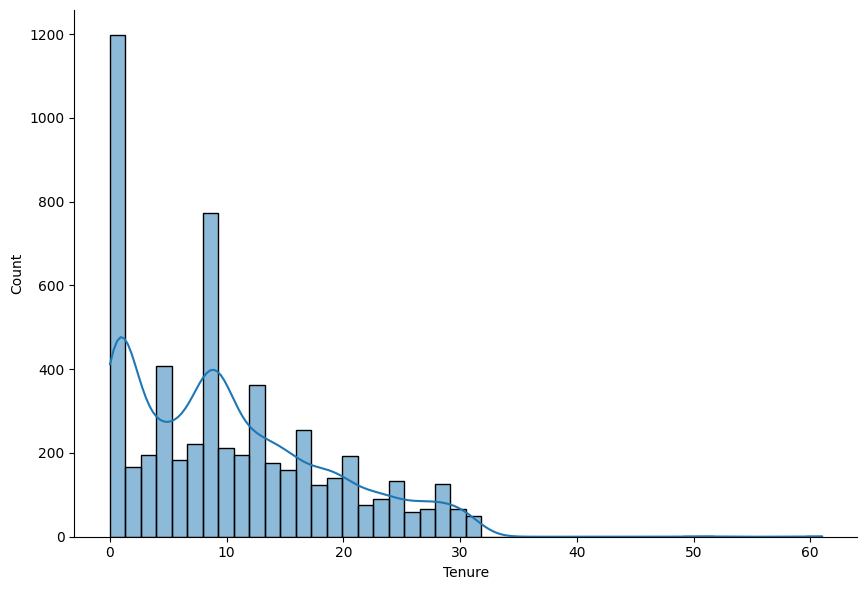

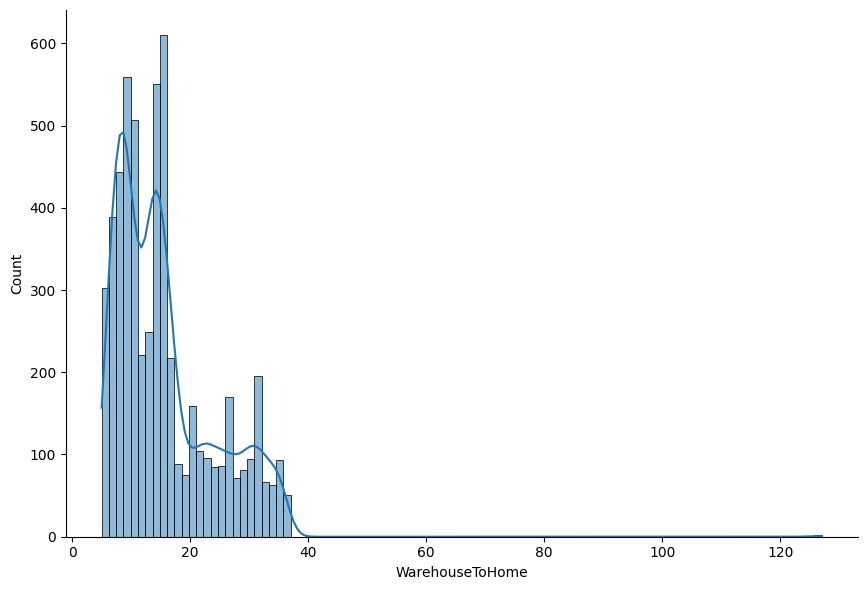

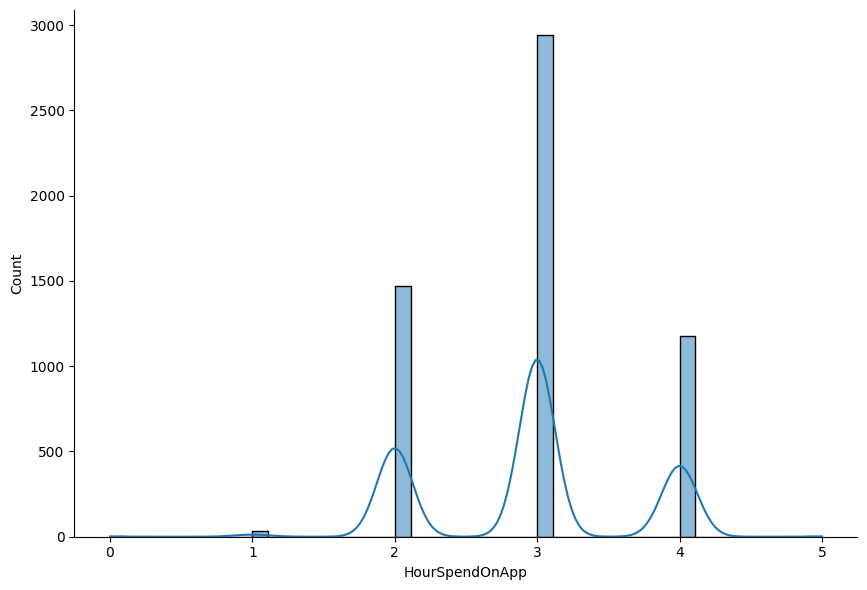

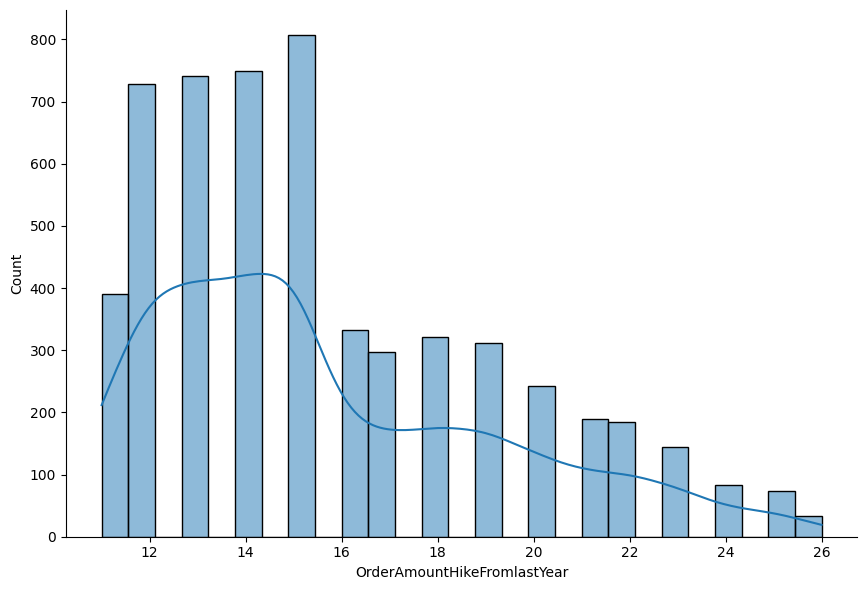

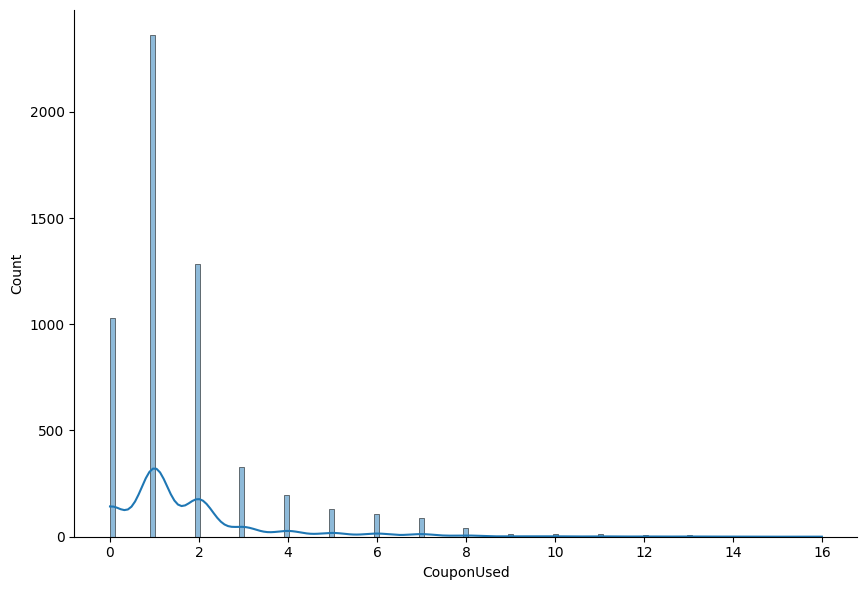

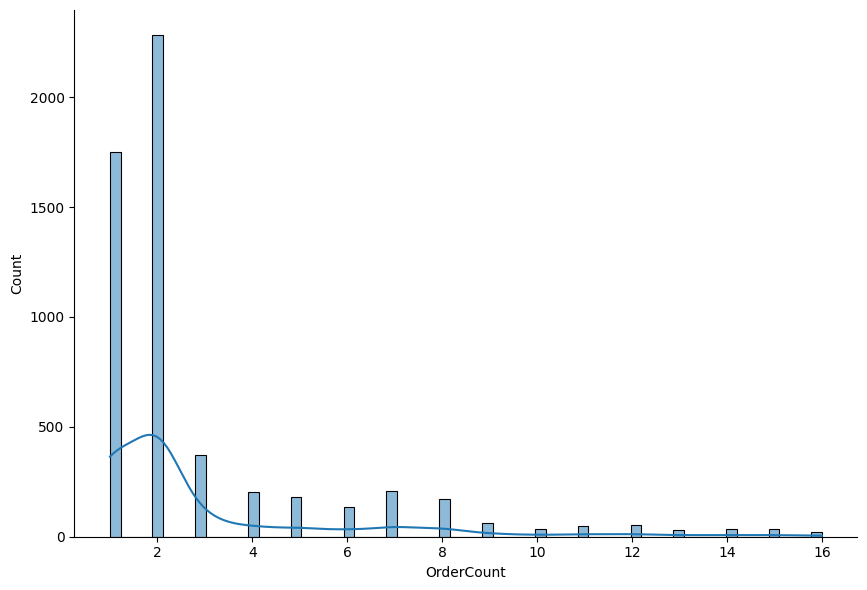

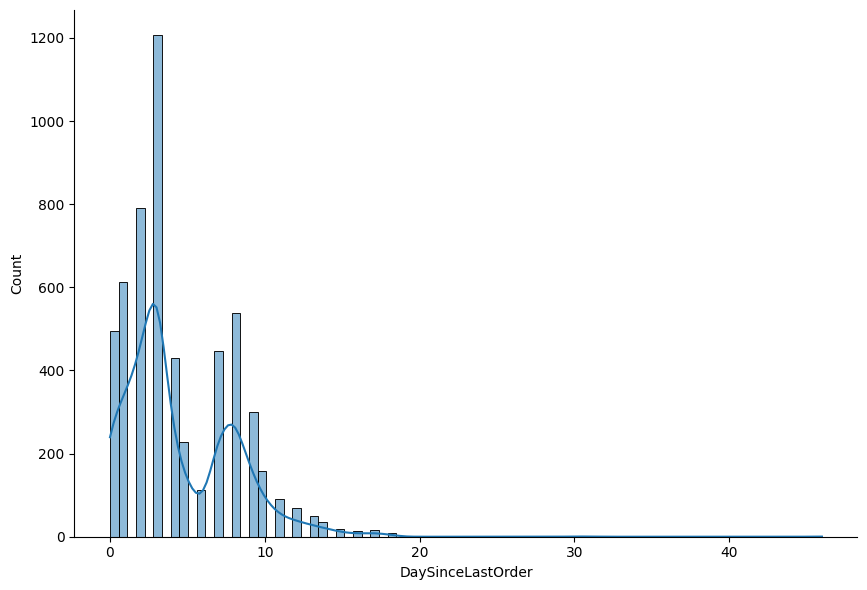

In [ ]:
for columns in col:
  sns.displot(data=data, x=columns, kde=True,height=6, aspect=11.7/8)

#### **Ensured that the imputation did not significantly altered the distribution.**

### **KNN Imputation.**

In [22]:
cols=data.columns
# Should be done after encoding and before scaling
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
data = imputer.fit_transform(data)
data = pd.DataFrame(data,columns=cols)
data

Churn  Tenure  Complain  OrderCount  CashbackAmount  \
0       1.0     4.0       1.0         1.0          159.93   
1       1.0     0.0       1.0         1.0          120.90   
2       1.0     0.0       1.0         1.0          120.28   
3       1.0     0.0       0.0         1.0          134.07   
4       1.0     0.0       0.0         1.0          129.60   
...     ...     ...       ...         ...             ...   
5625    0.0    10.0       0.0         2.0          150.71   
5626    0.0    13.0       0.0         2.0          224.91   
5627    0.0     1.0       1.0         2.0          186.42   
5628    0.0    23.0       0.0         2.0          178.90   
5629    0.0     8.0       0.0         2.0          169.04   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0.0                                  1.0   
1                          0.0                                  0.0   
2                          0.0                                  0.0   
3                          0.0                                  1.0   
4                          0.0                                  0.0   
...                        ...                                  ...   
5625                       0.0                                  1.0   
5626                       0.0                                  0.0   
5627                       0.0                                  1.0   
5628                       0.0                                  1.0   
5629                       0.0                                  1.0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                               0.0                      0.0   
1                               1.0                      0.0   
2                               1.0                      0.0   
3                               0.0                      0.0   
4                               1.0                      0.0   
...                             ...                      ...   
5625                            0.0                      0.0   
5626                            0.0                      0.0   
5627                            0.0                      0.0   
5628                            0.0                      0.0   
5629                            0.0                      0.0   

      MaritalStatus_Married  MaritalStatus_Single  
0                       0.0                   1.0  
1                       0.0                   1.0  
2                       0.0                   1.0  
3                       0.0                   1.0  
4                       0.0                   1.0  
...                     ...                   ...  
5625                    1.0                   0.0  
5626                    1.0                   0.0  
5627                    1.0                   0.0  
5628                    1.0                   0.0  
5629                    1.0                   0.0  

[5630 rows x 11 columns]

## **Detecting and treating Outliers.**

In [ ]:
data.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384    10.134103     1.654707        15.566785   
std     1625.385339     0.374240     8.357951     0.915389         8.345961   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     3.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         2.934636                  3.688988           3.066785   
std          0.705528                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5630.000000  5630.000000   
mean          4.214032     0.284902                    15.674600     1.716874   
std           2.583586     0.451408                     3.591058     1.857640   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5630.000000        5630.000000     5630.000000  
mean      2.961812           4.459325      177.223030  
std       2.879248           3.570626       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

### **Visualizing Outliers.**

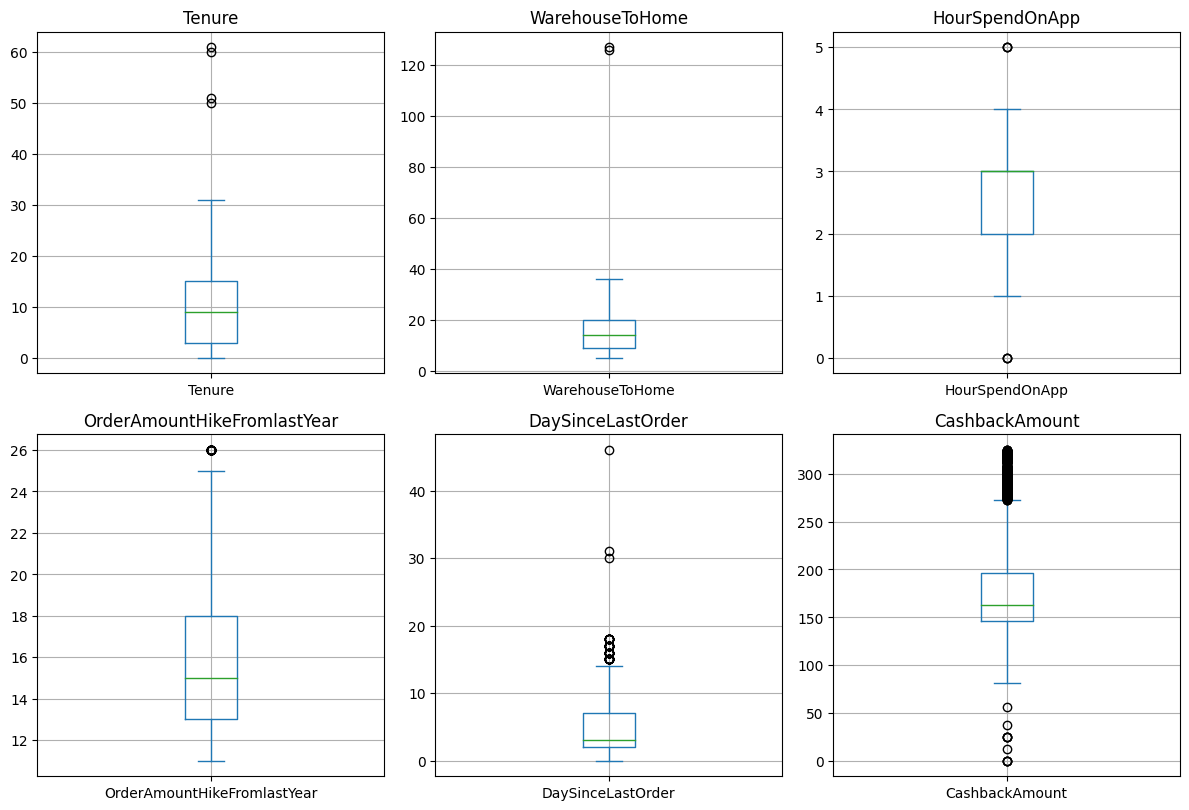

In [ ]:
# Selecting continuous numeric columns

col = [ 'Tenure','WarehouseToHome', 'HourSpendOnApp','OrderAmountHikeFromlastYear','DaySinceLastOrder', 'CashbackAmount']


# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot boxplots for each feature
for i, feature in enumerate(col):
    if feature in data.columns:
        data[feature].plot(kind='box', ax=axes[i], fontsize=10)
        axes[i].set_title(feature)
        axes[i].grid(True)
    else:
        axes[i].set_visible(False)  # Hide the subplot if the feature is not in the DataFrame

# Hide any unused subplots if there are fewer than 20 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Observing the prevalence of outliers in each column and finding the percentage of it w.r.t the data.**

In [ ]:
outlier_info = {}

for col in col:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data)) * 100

    # Store the results
    outlier_info[col] = {
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': outlier_percentage
    }

# Display the outlier information
for col, info in outlier_info.items():
    print(f"{col}: {info['Number of Outliers']} outliers, {info['Percentage of Outliers']:.2f}%")

Tenure: 4 outliers, 0.07%
WarehouseToHome: 2 outliers, 0.04%
HourSpendOnApp: 6 outliers, 0.11%
OrderAmountHikeFromlastYear: 33 outliers, 0.59%
DaySinceLastOrder: 62 outliers, 1.10%
CashbackAmount: 438 outliers, 7.78%


### **Analyzing Outliers.**

In [ ]:
# do this only for continuous numeric variables
df = data.copy()

class DataFrameOutlierDetector:
  def __init__(self, df):
    self.df = df

  def detect_outliers(self, column_name):

    Q1 = self.df[column_name].quantile(0.25)
    Q3 = self.df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)]

    outlier_df=pd.DataFrame(outliers)
    return outlier_df

  def outlier_describe(self, column_name):

    original_stats = self.df[column_name].describe()
    outlier = self.detect_outliers(column_name)
    non_outliers = self.df[~self.df.index.isin(outlier.index)]
    non_outlier_stats = non_outliers[column_name].describe()

    return pd.DataFrame({
        'with_outliers': original_stats,
        'without_outliers': non_outlier_stats
    })

  def plot_box(self, column_name):

    plt.figure(figsize=(6, 4))
    self.df.boxplot(column=column_name)
    plt.title(f'Box plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

detector = DataFrameOutlierDetector(df)

#### **1. Tenure.**

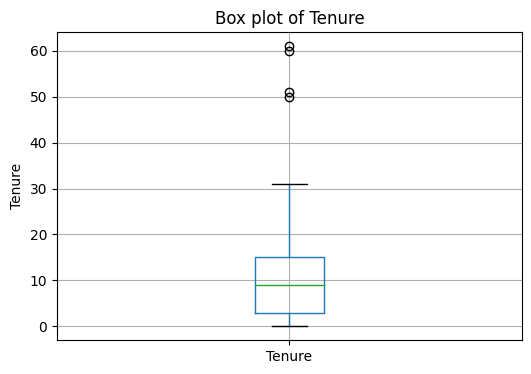

In [ ]:
detector.plot_box('Tenure')

In [ ]:
detector.detect_outliers('Tenure')

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
928        50929      0    50.0                     2         1   
2719       52720      0    60.0                     1         3   
3743       53744      0    51.0                     1         1   
5534       55535      0    61.0                     1         3   

      WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
928               6.0                     2       1             3.0   
2719             27.0                     2       0             3.0   
3743              7.0                     2       1             4.0   
5534             28.0                     2       0             4.0   

      NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
928                          1                 2                  3   
2719                         3                 1                  1   
3743                         2                 2                  3   
5534                         4                 1                  1   

      MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
928               0                1         0                         24.0   
2719              1                5         1                         13.0   
3743              0                2         0                         25.0   
5534              1                6         1                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
928          1.0         2.0                8.0          149.00  
2719         1.0         1.0                0.0          278.75  
3743         2.0         3.0                9.0          174.00  
5534         1.0         2.0                1.0          303.75

In [ ]:
detector.outlier_describe("Tenure")

with_outliers  without_outliers
count    5630.000000       5626.000000
mean       10.134103         10.101849
std         8.357951          8.271790
min         0.000000          0.000000
25%         3.000000          3.000000
50%         9.000000          9.000000
75%        15.000000         15.000000
max        61.000000         31.000000

#### **2.WarehouseToHome.**

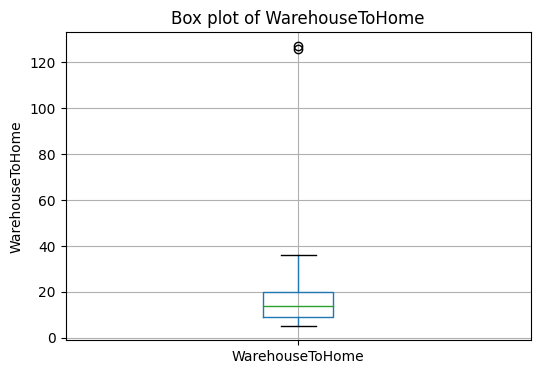

In [ ]:
detector.plot_box('WarehouseToHome')

In [ ]:
detector.detect_outliers('WarehouseToHome')

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
1309       51310      0    25.0                     0         3   
4124       54125      0    26.0                     0         3   

      WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
1309            126.0                     2       1             2.0   
4124            127.0                     2       1             3.0   

      NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
1309                         3                 3                  1   
4124                         4                 3                  1   

      MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1309              1                3         0                         15.0   
4124              1                4         0                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1309         1.0         1.0                0.0          134.82  
4124         2.0         2.0                1.0          159.82

In [ ]:
detector.outlier_describe("WarehouseToHome")

with_outliers  without_outliers
count    5630.000000       5628.000000
mean       15.566785         15.527363
std         8.345961          8.081102
min         5.000000          5.000000
25%         9.000000          9.000000
50%        14.000000         14.000000
75%        20.000000         20.000000
max       127.000000         36.000000

#### **3.HourSpendOnApp.**

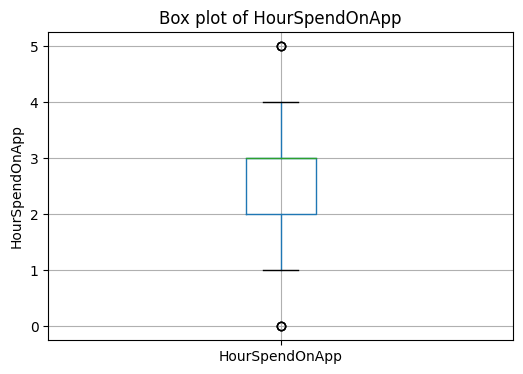

In [ ]:
detector.plot_box('HourSpendOnApp')

In [ ]:
detector.detect_outliers('HourSpendOnApp')

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
150        50151      0    10.0                     0         1   
950        50951      0     5.0                     1         1   
1950       51951      0    11.0                     0         1   
4223       54224      0    31.0                     1         3   
4248       54249      0     4.0                     1         1   
4351       54352      0     1.0                     2         1   

      WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
150               6.0                     1       0             0.0   
950              16.0                     1       1             0.0   
1950             18.0                     2       1             0.0   
4223             32.0                     2       0             5.0   
4248              9.0                     2       1             5.0   
4351             16.0                     1       0             5.0   

      NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
150                          3                 0                  2   
950                          3                 0                  1   
1950                         4                 2                  5   
4223                         4                 0                  5   
4248                         5                 2                  1   
4351                         4                 3                  4   

      MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
150               1                3         1                         18.0   
950               2                3         0                         25.0   
1950              1                3         0                         15.0   
4223              2                9         0                         12.0   
4248              1                3         0                         20.0   
4351              2                3         0                         17.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
150          0.0         2.0                2.0          236.03  
950          0.0         1.0                3.0          212.44  
1950         1.0         1.0                2.0          162.88  
4223         7.0         8.0               10.0          201.37  
4248         4.0        11.0                9.0          166.52  
4351         1.0         2.0                4.0          147.79

In [ ]:
detector.outlier_describe("HourSpendOnApp")

with_outliers  without_outliers
count    5630.000000       5624.000000
mean        2.934636          2.935100
std         0.705528          0.701021
min         0.000000          1.000000
25%         2.000000          2.000000
50%         3.000000          3.000000
75%         3.000000          3.000000
max         5.000000          4.000000

#### **4.OrderAmountHikeFromlastYear.**

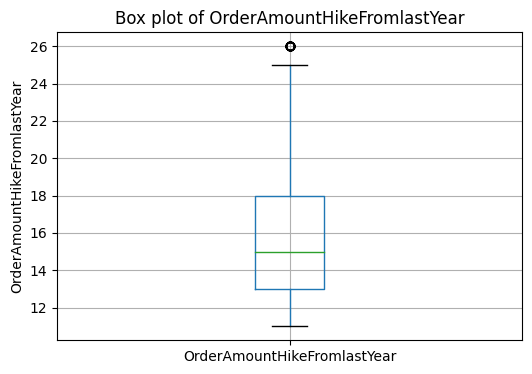

In [ ]:
detector.plot_box('OrderAmountHikeFromlastYear')

In [ ]:
detector.detect_outliers('OrderAmountHikeFromlastYear')

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
2868       52869      0    20.0                     1         3   
2941       52942      0    13.0                     0         1   
2971       52972      0    16.0                     1         3   
3124       53125      0     5.0                     1         1   
3366       53367      0     9.0                     1         1   
3543       53544      0     1.0                     1         1   
3565       53566      0    18.0                     1         1   
3582       53583      1     1.0                     0         1   
3761       53762      0    23.0                     1         1   
3765       53766      0     6.0                     1         1   
3777       53778      0     8.0                     2         3   
3856       53857      0    22.0                     0         1   
3888       53889      0     7.0                     0         3   
3997       53998      0     2.0                     1         1   
4062       54063      0    13.0                     1         1   
4122       54123      0    11.0                     1         1   
4280       54281      0     4.0                     0         1   
4338       54339      0    20.0                     1         3   
4411       54412      0    13.0                     0         1   
4441       54442      0    16.0                     1         3   
4594       54595      0     5.0                     1         1   
4836       54837      0     9.0                     1         1   
5013       55014      0     1.0                     1         1   
5035       55036      0    18.0                     1         1   
5052       55053      1     1.0                     0         1   
5231       55232      0    23.0                     1         1   
5235       55236      0     6.0                     1         1   
5247       55248      0     8.0                     2         3   
5326       55327      0    22.0                     0         1   
5358       55359      0     7.0                     0         3   
5467       55468      0     2.0                     1         1   
5532       55533      0    13.0                     1         1   
5592       55593      0    11.0                     1         1   

      WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
2868              7.0                     3       0             4.0   
2941              9.0                     0       0             4.0   
2971              7.0                     2       1             3.0   
3124             16.0                     2       1             3.0   
3366             28.0                     2       0             3.0   
3543             16.0                     2       1             3.0   
3565             36.0                     4       1             3.0   
3582             17.0                     1       0             4.0   
3761             10.0                     1       0             3.0   
3765             17.0                     1       1             1.0   
3777             14.0                     0       1             3.0   
3856             11.0                     1       1             3.0   
3888             23.0                     2       0             3.0   
3997              7.0                     1       0             4.0   
4062             16.0                     1       1             3.0   
4122             17.0                     2       0             3.0   
4280             30.0                     2       1             4.0   
4338              7.0                     3       0             4.0   
4411              9.0                     0       0             4.0   
4441              7.0                     2       1             2.0   
4594             16.0                     2       1             3.0   
4836             28.0                     2       0             3.0   
5013             16.0                     2       1             3.0   
5035             36.0  

In [ ]:
detector.outlier_describe("OrderAmountHikeFromlastYear")

with_outliers  without_outliers
count    5630.000000       5597.000000
mean       15.674600         15.613722
std         3.591058          3.512738
min        11.000000         11.000000
25%        13.000000         13.000000
50%        15.000000         15.000000
75%        18.000000         18.000000
max        26.000000         25.000000

#### **5.DaySinceLastOrder.**

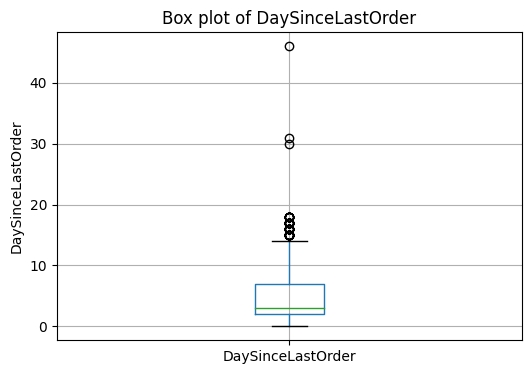

In [ ]:
detector.plot_box('DaySinceLastOrder')

In [ ]:
detector.detect_outliers('DaySinceLastOrder')

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
28         50029      0    18.0                     2         1   
62         50063      0    28.0                     1         1   
106        50107      0    15.0                     1         1   
261        50262      0    10.0                     2         1   
436        50437      0    25.0                     1         3   
...          ...    ...     ...                   ...       ...   
5238       55239      0    18.0                     1         1   
5461       55462      0    31.0                     0         3   
5490       55491      0    17.0                     1         1   
5508       55509      0    14.0                     1         1   
5603       55604      0    16.0                     1         1   

      WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
28               14.0                     2       1             2.0   
62               20.0                     1       1             3.0   
106              10.0                     0       1             2.0   
261              20.0                     2       0             3.0   
436               9.0                     3       1             2.0   
...               ...                   ...     ...             ...   
5238             35.0                     2       1             3.0   
5461              9.0                     1       1             3.0   
5490             13.0                     1       0             3.0   
5508              8.0                     2       1             4.0   
5603              9.0                     2       1             3.0   

      NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
28                           3                 2                  4   
62                           2                 4                  4   
106                          3                 4                  2   
261                          3                 3                  5   
436                          4                 1                  5   
...                        ...               ...                ...   
5238                         4                 1                  5   
5461                         4                 1                  4   
5490                         5                 4                  3   
5508                         4                 1                  5   
5603                         4                 4                  3   

      MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
28                1                9         0                         18.0   
62                2                9         0                         11.0   
106               0                2         0                         15.0   
261               1                2         0                         12.0   
436               0                2         0                         11.0   
...             ...              ...       ...                          ...   
5238              1                5         0                         14.0   
5461              1                6         0                         23.0   
5490              1                9         0                         15.0   
5508              1                4         0                         15.0   
5603              1                7         0                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
28           1.0         1.0               15.0          123.48  
62           1.0         2.0               15.0          287.22  
106          0.0        11.0               15.0          292.32  
261          3.0        12.0               17.0          130.34  
436          1.0         1.0               16.0          268.56  
...          ...         ...                ...             ...  
5238         1.0        15.0               18.0          288.28  
5461         1.0  

In [ ]:
detector.outlier_describe("DaySinceLastOrder")

with_outliers  without_outliers
count    5630.000000        5568.00000
mean        4.459325           4.31699
std         3.570626           3.28901
min         0.000000           0.00000
25%         2.000000           2.00000
50%         3.000000           3.00000
75%         7.000000           7.00000
max        46.000000          14.00000

#### **6.CashbackAmount.**

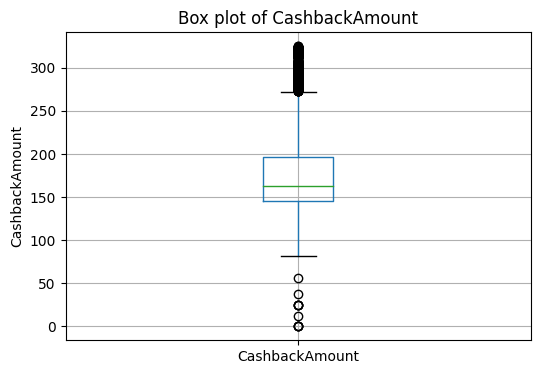

In [ ]:
detector.plot_box('CashbackAmount')

In [ ]:
detector.detect_outliers('CashbackAmount')

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
10         50011      1     4.0                     1         1   
40         50041      0    23.0                     1         1   
61         50062      0    13.0                     1         1   
62         50063      0    28.0                     1         1   
65         50066      0    25.0                     1         1   
...          ...    ...     ...                   ...       ...   
5534       55535      0    61.0                     1         3   
5537       55538      0    23.0                     0         1   
5561       55562      0    29.0                     1         2   
5597       55598      0    13.0                     0         1   
5603       55604      0    16.0                     1         1   

      WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
10               18.0                     0       0             2.0   
40               17.0                     2       0             2.0   
61               10.0                     1       0             2.0   
62               20.0                     1       1             3.0   
65                6.0                     2       1             3.0   
...               ...                   ...     ...             ...   
5534             28.0                     2       0             4.0   
5537              9.0                     2       1             3.0   
5561             33.0                     4       1             4.0   
5597             16.0                     2       1             3.0   
5603              9.0                     2       1             3.0   

      NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
10                           3                 4                  3   
40                           3                 4                  4   
61                           3                 4                  3   
62                           2                 4                  4   
65                           4                 4                  3   
...                        ...               ...                ...   
5534                         4                 1                  1   
5537                         4                 4                  1   
5561                         2                 4                  4   
5597                         4                 4                  1   
5603                         4                 4                  3   

      MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
10                0                2         0                         15.0   
40                2                4         0                         15.0   
61                0                2         0                         14.0   
62                2                9         0                         11.0   
65                0                1         0                         15.0   
...             ...              ...       ...                          ...   
5534              1                6         1                         15.0   
5537              1                5         0                         15.0   
5561              1                6         1                         15.0   
5597              2                4         0                         15.0   
5603              1                7         0                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
10           9.0        15.0                8.0          295.45  
40           2.0         4.0                4.0          299.26  
61           1.0         9.0                9.0          290.33  
62           1.0         2.0               15.0          287.22  
65           1.0        11.0                9.0          299.99  
...          ...         ...                ...             ...  
5534         1.0         2.0                1.0          303.75  
5537         5.0  

In [ ]:
detector.outlier_describe("CashbackAmount")

with_outliers  without_outliers
count    5630.000000       5192.000000
mean      177.223030        167.570089
std        49.207036         35.331390
min         0.000000         81.000000
25%       145.770000        144.832500
50%       163.280000        159.235000
75%       196.392500        186.202500
max       324.990000        272.320000

## **Encoding.**

### Label Encoding.

In [12]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [13]:
# Creating a label encoder object
le = LabelEncoder()

# Applying label encoding to each specified column
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [ ]:
data.head()

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0                     1         3              6.0   
1       50002      1     9.0                     2         1              8.0   
2       50003      1     9.0                     2         1             30.0   
3       50004      1     0.0                     2         3             15.0   
4       50005      1     0.0                     2         1             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   
4                     1       1             3.0                         3   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

## **Feature Selection.**

### **For Categorical Variables:**

In [10]:
from sklearn.feature_selection import chi2

In [14]:
X = data[['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']].values
y = data['Churn']

# Apply Chi-Square test
chi2_values, p_values = chi2(X, y)

# Create a DataFrame to display the results
chi2_df = pd.DataFrame({'Feature': ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'],
                        'Chi2 Value': chi2_values,
                        'p-value': p_values})

# Sort by Chi2 value in descending order
chi2_df = chi2_df.sort_values(by='Chi2 Value', ascending=False)

print(chi2_df)

                Feature  Chi2 Value       p-value
4         MaritalStatus   41.864276  9.783383e-11
3      PreferedOrderCat   35.442910  2.626366e-09
2                Gender    1.923376  1.654850e-01
0  PreferredLoginDevice    0.538794  4.629331e-01
1  PreferredPaymentMode    0.018046  8.931362e-01



1.    **MaritalStatus:** This feature has a very strong association with Churn. The extremely low p-value indicates that the association is statistically significant.
2.   **PreferedOrderCat:**  This feature also shows a strong and statistically significant association with Churn.

3.   Gender: This feature has a weak association with Churn, and the p-value is higher than 0.05, indicating that the association is not statistically significant.
4.   PreferredLoginDevice: This feature shows a very weak association with Churn, and the high p-value suggests that the association is not statistically significant.
5.   PreferredPaymentMode: This feature has the weakest association with Churn, and the p-value is very high, indicating no statistically significant relationship.









### **One-Hot Encoding the Selected Categorical Features.**

#### This is done as our variables are nominal categorical variables where there is no inherent order or ranking among categories. Label encoding in these selected features may introduce bias in algorithms.

In [18]:
data = data.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','Gender'], axis = 1)

from sklearn.preprocessing import OneHotEncoder

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(drop='first',sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

#data = data.drop(columns=['PreferedOrderCat','MaritalStatus'])
# Drop the original categorical columns from the dataset
data = data.drop(columns=categorical_columns, axis=1)

# Concatenate the one-hot encoded dataframe with the original dataframe
data = pd.concat([data, one_hot_df], axis=1)
data = pd.DataFrame(data)
data

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0          50001      1     4.0         3              6.0             3.0   
1          50002      1     NaN         1              8.0             3.0   
2          50003      1     NaN         1             30.0             2.0   
3          50004      1     0.0         3             15.0             2.0   
4          50005      1     0.0         1             12.0             NaN   
...          ...    ...     ...       ...              ...             ...   
5625       55626      0    10.0         1             30.0             3.0   
5626       55627      0    13.0         1             13.0             3.0   
5627       55628      0     1.0         1             11.0             3.0   
5628       55629      0    23.0         3              9.0             4.0   
5629       55630      0     8.0         1             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      ...  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  \
0     ...         1.0         1.0                5.0          159.93   
1     ...         0.0         1.0                0.0          120.90   
2     ...         0.0         1.0                3.0          120.28   
3     ...         0.0         1.0                3.0          134.07   
4     ...         1.0         1.0                3.0          129.60   
...   ...         ...         ...                ...             ...   
5625  ...         1.0         2.0                4.0          150.71   
5626  ...         1.0         2.0                NaN          224.91   
5627  ...         1.0         2.0                4.0          186.42   
5628  ...         2.0         2.0                9.0          178.90   
5629  ...         2.0         2.0                3.0          169.04   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0.0                                  1.0   
1                          0.0                                  0.0   
2                          0.0                                  0.0   
3                          0.0                                  1.0   
4                          0.0                                  0.0   
...                        ...                                  ...   
5625                       0.0                                  1.0   
5626                       0.0                                  0.0   
5627                       0.0                                  1.0   
5628                       0.0                                  1.0   
5629                       0.0                                  1.0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                               0.0                      0.0   
1                               1.0                      0.0   
2                               1.0                      0.0   
3                               0.0                      0.0   
4                               1.0                      0.0   
...   

### **For Numeric Features.**

#### **Correlation Coefficient.**

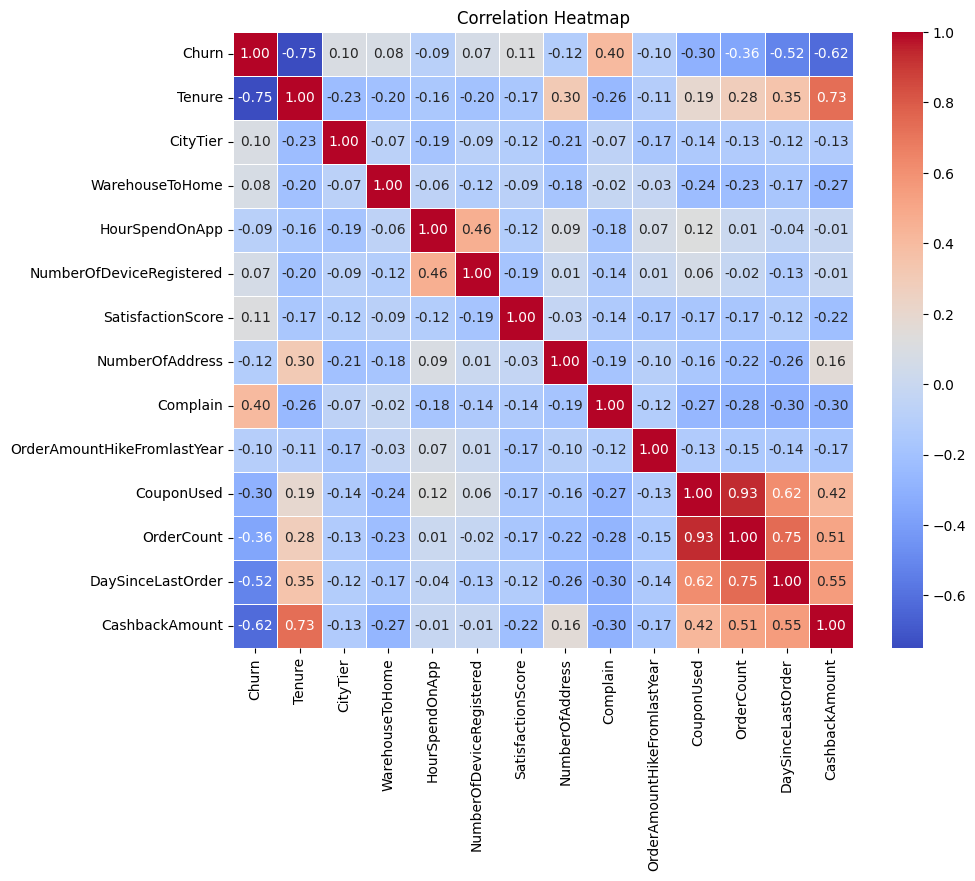

In [ ]:
# Selecting only the numeric columns (excluding CustomerID )
numeric_columns = ['Churn','Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

numeric_df = df[numeric_columns]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix is calculated to understand the relationships between

*   The correlation matrix is calculated to understand the relationships between all pairs of features.
*   Only features with high correlation coefficients with the target are selected.

* From the pairs of highly correlated features, we dropped the one with the lower correlation with the target variable.
*  Numeric Columns selected for model building are: Tenure, Complain, Order Count, and Cash Back Amount.


#### **Fisher's Score.**

In [ ]:
pip install numpy pandas matplotlib skfeature-chappers


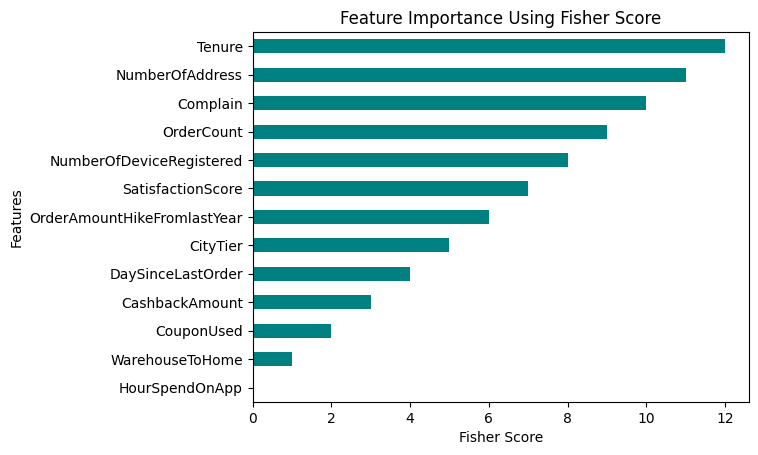

HourSpendOnApp                  0
WarehouseToHome                 1
CouponUsed                      2
CashbackAmount                  3
DaySinceLastOrder               4
CityTier                        5
OrderAmountHikeFromlastYear     6
SatisfactionScore               7
NumberOfDeviceRegistered        8
OrderCount                      9
Complain                       10
NumberOfAddress                11
Tenure                         12
dtype: int64

In [ ]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline


# Separating the features and the target
X = data.drop(columns=['Churn', 'CustomerID', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']).values
Y = data['Churn'].values

# Calculating Fisher scores
ranks = fisher_score.fisher_score(X, Y)

# Creating a Series for plotting
feature_names = data.drop(columns=['Churn', 'CustomerID', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']).columns
feat_importances = pd.Series(ranks, index=feature_names)

# Sorting the feature importances in ascending order
sorted_feat_importances = feat_importances.sort_values()

# Plotting the feature importances
sorted_feat_importances.plot(kind='barh', color='teal')
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Feature Importance Using Fisher Score')
plt.show()

# Return the ranks of the variables in ascending order
sorted_feat_importances


Top 7 features selected by combined score of Fisher's score and correlation coefficient:
Index(['Tenure', 'NumberOfAddress', 'Complain', 'OrderCount',
       'NumberOfDeviceRegistered', 'SatisfactionScore',
       'OrderAmountHikeFromlastYear'],
      dtype='object')


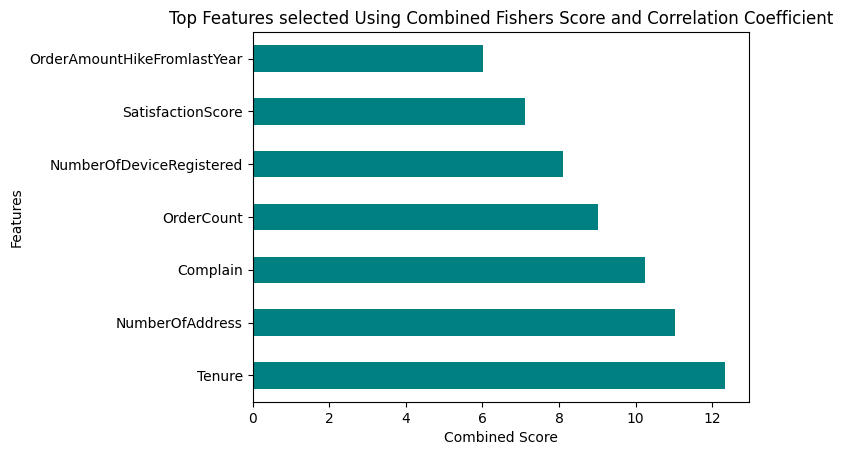

In [ ]:
# Calculating correlation coefficients
correlations = []
for col in numeric_columns:
    corr = np.corrcoef(data[col], Y)[0, 1]
    correlations.append(corr)
correlations = np.array(correlations)

# Combining Fisher scores and correlation coefficients
combined_scores = fisher_scores + abs(correlations)

# Sorting features by the combined score in descending order
sorted_combined_scores = combined_scores.sort_values(ascending=False)

# Select the top 7 features
top_features = sorted_combined_scores.index[:7]
X_selected = data[top_features].values

# Display the top features
print(f"Top 7 features selected by combined score of Fisher's score and correlation coefficient:")
print(top_features)

# Plotting the feature importances
sorted_combined_scores.head(7).plot(kind='barh', color='teal')
plt.xlabel('Combined Score')
plt.ylabel('Features')
plt.title('Top Features selected Using Combined Fishers Score and Correlation Coefficient')
plt.show()

#### **Information gain.**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Sample numeric columns
numeric_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Assuming `data` is your DataFrame containing the relevant columns
X = data[numeric_columns].values
Y = data['Churn'].values  # Target variable

# Calculate Information Gain for each feature
information_gains = mutual_info_classif(X, Y)

# Create a DataFrame to store the Information Gain values for each feature
information_gain_df = pd.DataFrame(information_gains, index=numeric_columns, columns=['Information Gain'])

# Sort features by Information Gain in descending order
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

# Display Information Gain values
print("Information Gain for each feature:")
print(information_gain_df)

Information Gain for each feature:
                             Information Gain
CashbackAmount                       0.142229
Tenure                               0.111597
Complain                             0.034699
DaySinceLastOrder                    0.017159
WarehouseToHome                      0.013032
NumberOfDeviceRegistered             0.009666
SatisfactionScore                    0.009311
NumberOfAddress                      0.006744
CouponUsed                           0.006170
CityTier                             0.003739
HourSpendOnApp                       0.001523
OrderAmountHikeFromlastYear          0.001066
OrderCount                           0.000000


### We are getting three different combinations of features here.
### 1. Tenure, Complain, Order Count, Cashback Amount.
### 2. Tenure ,Complain , Order Count, NumberOfAddress
### 3. Tenure, Complain, DaySincslastorder, Cashback Amount  

### The feature combination with the best accuracy on model building would be taken for our churn prediction model.

# **Week 4: Scaling and Model Building.**

In [19]:
# Selected features for Model Building.
Features = ['MaritalStatus','PreferedOrderCat','Tenure','Complain', 'OrderCount', 'CashbackAmount']

data = data.drop(['CustomerID', 'CityTier',
       'WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder'], axis=1)

In [ ]:
data.dtypes

Churn                                  float64
Tenure                                 float64
Complain                               float64
OrderCount                             float64
CashbackAmount                         float64
PreferedOrderCat_Grocery               float64
PreferedOrderCat_Laptop & Accessory    float64
PreferedOrderCat_Mobile Phone          float64
PreferedOrderCat_Others                float64
MaritalStatus_Married                  float64
MaritalStatus_Single                   float64
dtype: object

#### **Checking the distribution of the selected features.**

In [ ]:
from scipy.stats import skew
#numeric_features = data.select_dtypes(include=['number'])
skewness = data.apply(skew)
print(skewness)

Churn                                  1.772370
Tenure                                 0.777637
Complain                               0.953093
OrderCount                             2.091416
CashbackAmount                         1.149539
PreferedOrderCat_Grocery               3.287895
PreferedOrderCat_Laptop & Accessory    0.564772
PreferedOrderCat_Mobile Phone          0.540968
PreferedOrderCat_Others                4.286602
MaritalStatus_Married                 -0.121717
MaritalStatus_Single                   0.776649
dtype: float64


In [ ]:
data.describe().round(2)

Churn   Tenure  Complain  OrderCount  CashbackAmount  \
count  5630.00  5630.00   5630.00     5630.00         5630.00   
mean      0.17     9.96      0.28        3.09          177.22   
std       0.37     8.48      0.45        2.96           49.21   
min       0.00     0.00      0.00        1.00            0.00   
25%       0.00     2.00      0.00        1.00          145.77   
50%       0.00     8.00      0.00        2.00          163.28   
75%       0.00    15.00      1.00        3.00          196.39   
max       1.00    61.00      1.00       16.00          324.99   

       PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
count                   5630.00                              5630.00   
mean                       0.07                                 0.36   
std                        0.26                                 0.48   
min                        0.00                                 0.00   
25%                        0.00                                 0.00   
50%                        0.00                                 0.00   
75%                        0.00                                 1.00   
max                        1.00                                 1.00   

       PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
count                        5630.00                  5630.00   
mean                            0.37                     0.05   
std                             0.48                     0.21   
min                             0.00                     0.00   
25%                             0.00                     0.00   
50%                             0.00                     0.00   
75%                             1.00                     0.00   
max                             1.00                     1.00   

       MaritalStatus_Married  MaritalStatus_Single  
count                5630.00               5630.00  
mean                    0.53                  0.32  
std                     0.50                  0.47  
min                     0.00                  0.00  
25%                     0.00                  0.00  
50%                     1.00                  0.00  
75%                     1.00                  1.00  
max                     1.00                  1.00

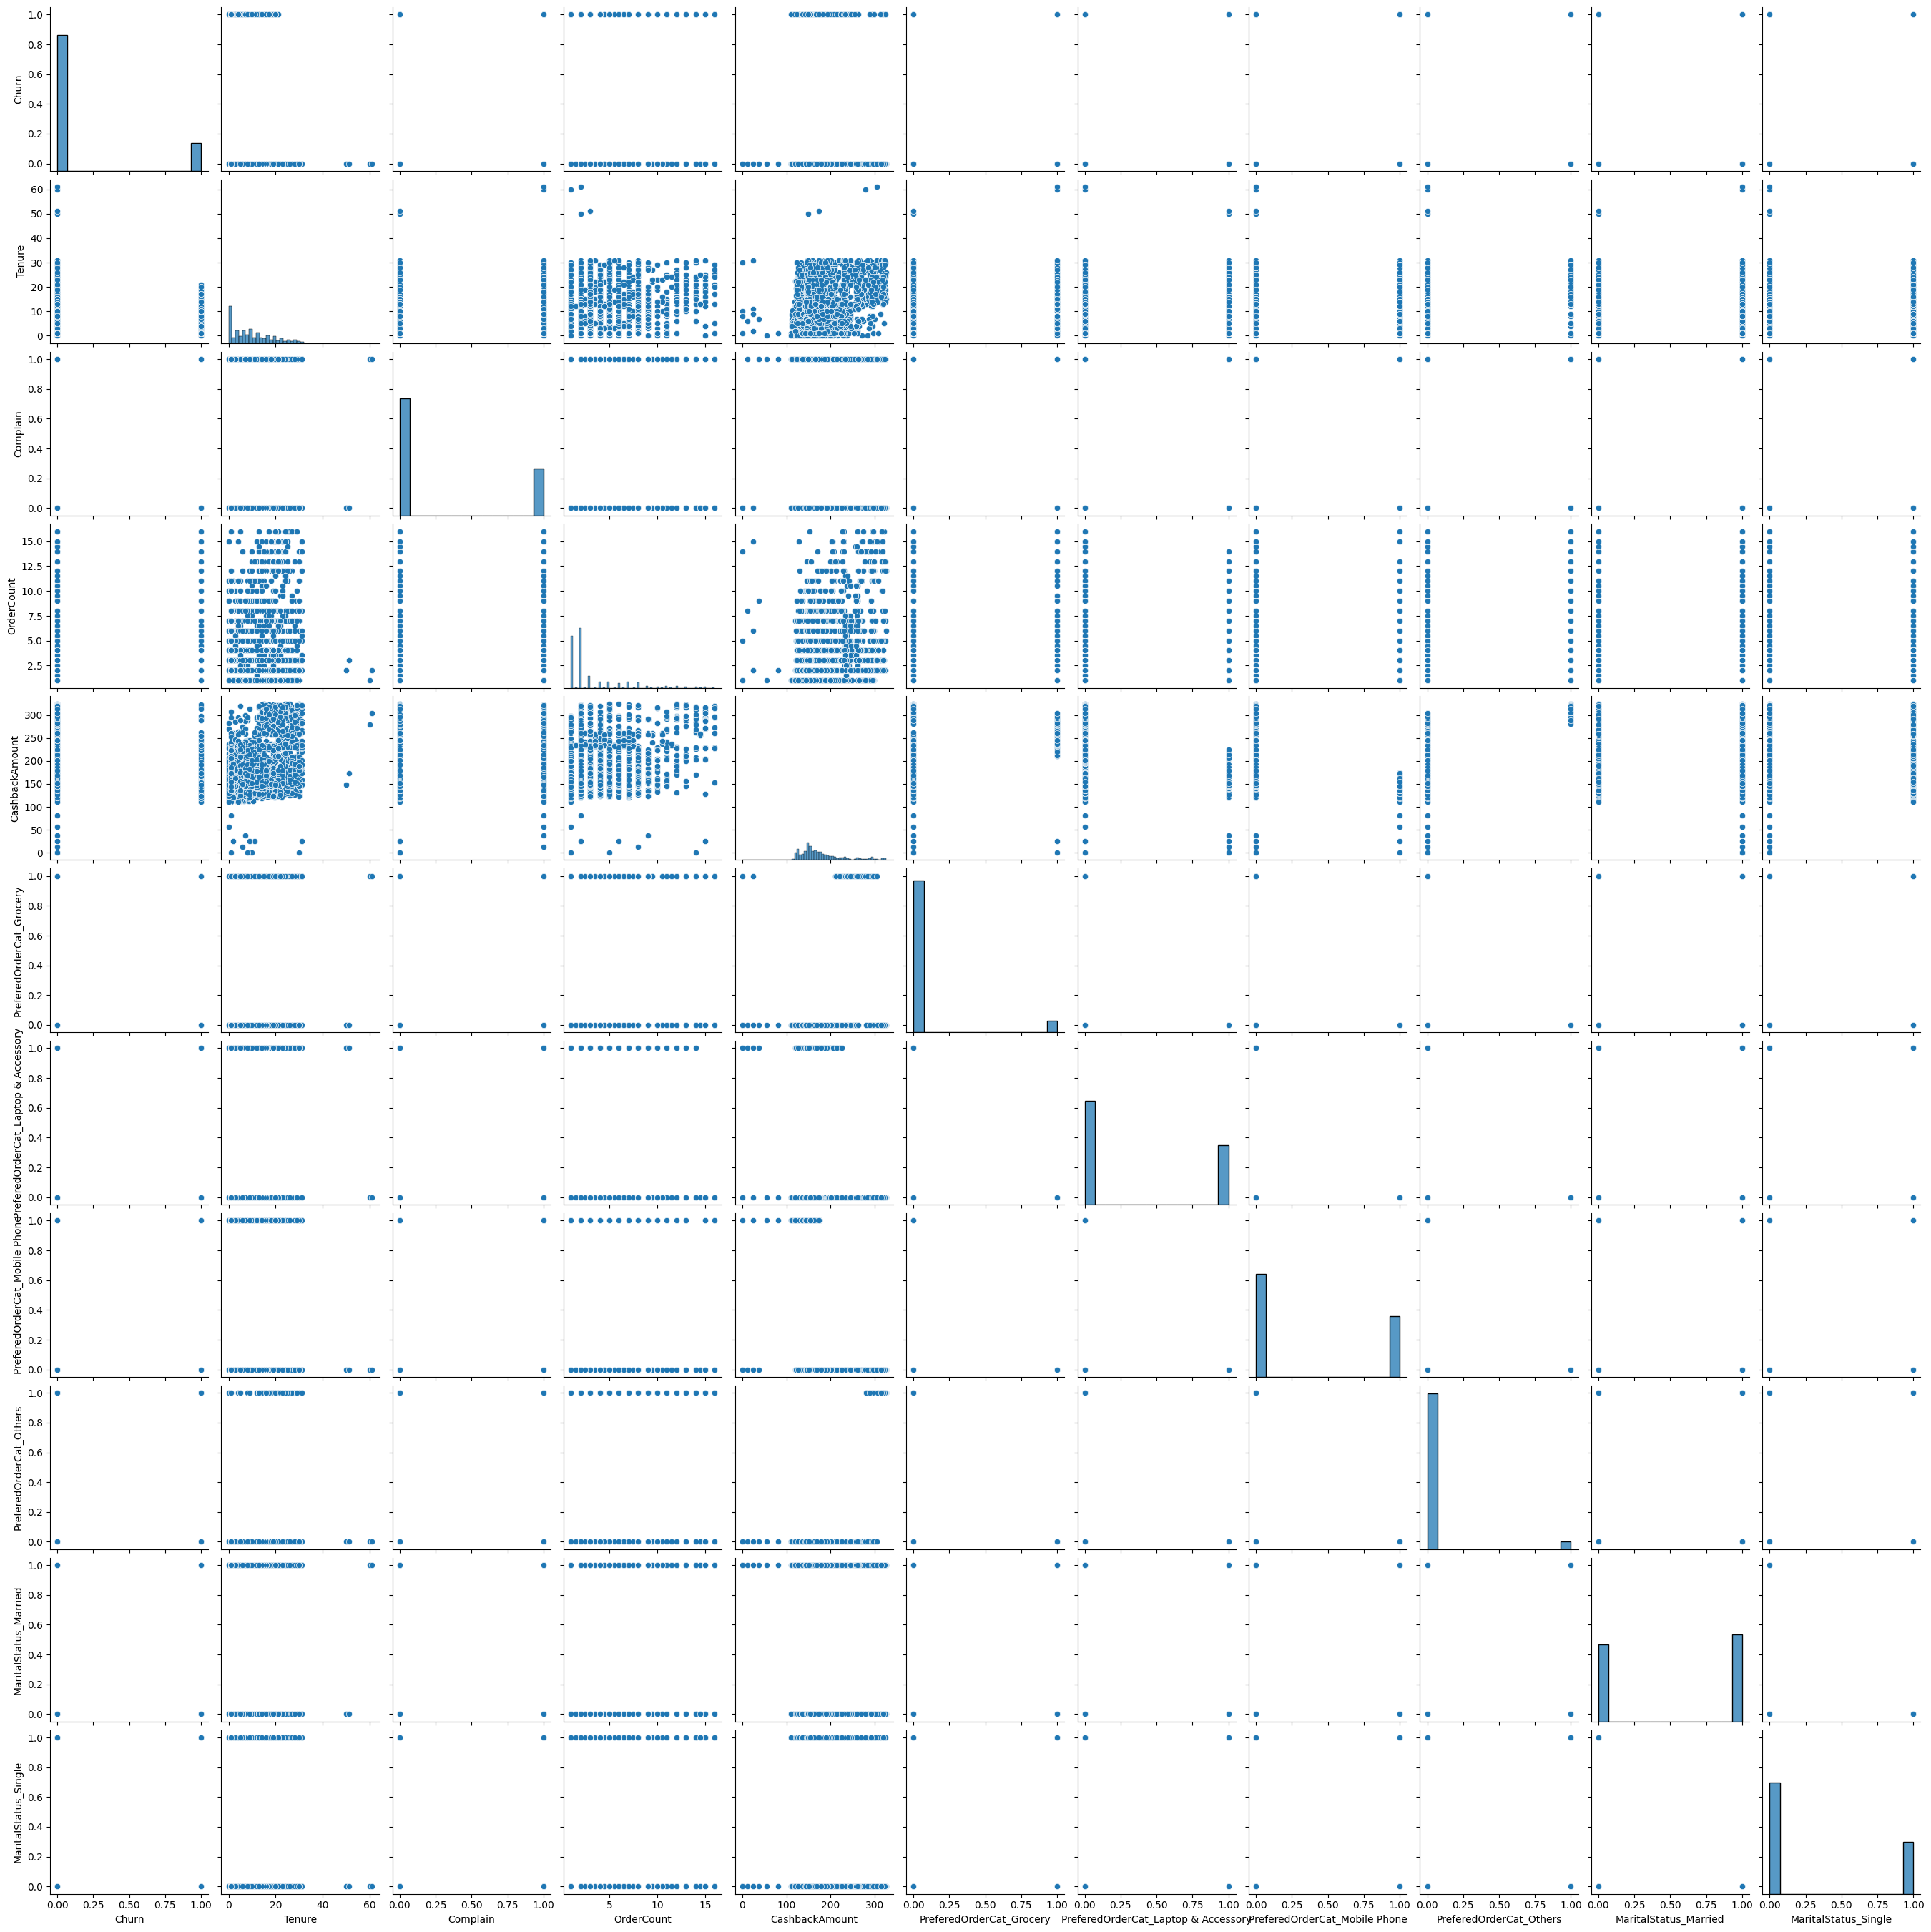

In [ ]:
sns.pairplot(data)

## **Predictive Modelling**

### **Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split

X= data.drop(columns=['Churn'])
y= data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Standard Scaling.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= data.drop(columns=['Churn'])
y= data['Churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Tenure'	,'OrderCount'	,'CashbackAmount']])
X.drop(columns=['Tenure'	,'OrderCount'	,'CashbackAmount'], inplace=True)
X_df = pd.DataFrame(X_scaled, columns=['Tenure'	,'OrderCount'	,'CashbackAmount'])
X=pd.concat([X,X_df],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### After standardization, all models' accuracy and classification metrics are getting dropped. Decision Tree Classifier is emerging as the best model here.

### Normalization.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

X= data.drop(columns=['Churn'])
y= data['Churn']

normalizer = MinMaxScaler()
X_normal = normalizer.fit_transform(X[['Tenure'	,'OrderCount'	,'CashbackAmount']])
X.drop(columns=['Tenure'	,'OrderCount'	,'CashbackAmount'], inplace=True)
X_df = pd.DataFrame(X_normal, columns=['Tenure'	,'OrderCount'	,'CashbackAmount'])
X=pd.concat([X,X_df],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### Normalization improves the overall accuracy and metrics of all models, producing Decision Tree as the best model.

### Transformations.

#### 1. Yeo-Johnson transformation.

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_transformed = pt.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Step 3: Apply the same transformation to the test data
X_test_transformed = pt.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

#### 2. Square root transformation.

In [ ]:
# Apply square root transformation to each skewed feature
skewed_features = ['Churn', 'Tenure', 'Complain', 'OrderCount', 'CashbackAmount',
                   'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
                   'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
                   'MaritalStatus_Married', 'MaritalStatus_Single']
for feature in skewed_features :
    data[feature] = np.sqrt(data[feature])

#### 3.Log Transformation.

In [ ]:
skewed_features = ['Churn', 'Tenure', 'Complain', 'OrderCount', 'CashbackAmount',
                   'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
                   'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
                   'MaritalStatus_Married', 'MaritalStatus_Single']

# Apply log transformation to each skewed feature
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

### **Model Selection**

In [ ]:
pip install xgboost

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Run after "pip install xgboost"
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1=model.predict(X_train)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred1)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print('*'*30)
    print(f'{name} Classifier:')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')

******************************
Decision Tree Classifier:
Train Accuracy: 0.9998
Test Accuracy: 0.9425
Precision: 0.9426
Recall: 0.9425
F1 Score: 0.9425

******************************
Random Forest Classifier:
Train Accuracy: 0.9998
Test Accuracy: 0.9304
Precision: 0.9280
Recall: 0.9304
F1 Score: 0.9285

******************************
XGBoost Classifier:
Train Accuracy: 0.9652
Test Accuracy: 0.9148
Precision: 0.9107
Recall: 0.9148
F1 Score: 0.9112



## **Fine Tuning**

### **GridSearchCV**

#### **1.Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4,6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
print("*"*50)
print("Best Accuracy Score:", round((grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

Best Hyperparameters: {'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
**************************************************
Best Accuracy Score: 92.99  %
Test Set Accuracy: 95.45  %
Precision: 95.31 %
Recall: 95.31 %
F1 Score: 95.3100 %
**************************************************
DecisionTreeClassifier(criterion='log_loss')


#### **2. Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

rf_param_grid = {
    'n_estimators': [ 300, 400],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1],
}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_model = rf_grid_search.best_estimator_

print("Best Hyperparameters:", rf_grid_search.best_params_)
print("*"*50)
print("Best Accuracy Score:", round((rf_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400}
**************************************************
Best Accuracy Score: 92.42  %
Test Set Accuracy: 93.11  %
Precision: 92.67 %
Recall: 92.9 %
F1 Score: 92.7300 %
**************************************************
RandomForestClassifier(n_estimators=400, n_jobs=-1)


#### **3. XGBoost Classifier**

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xg_param_grid = {
    'max_depth': [7,8,9],
    'learning_rate': [0.2,0.3,0.4],
    'n_estimators': [200, 400,500],
    'reg_alpha': [0.05,0.1, 0.5],
    'reg_lambda': [1, 1.5,2]
}

xg_grid_search = GridSearchCV(estimator=xgb, param_grid=xg_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
xg_grid_search.fit(X_train, y_train)
best_model = xg_grid_search.best_estimator_

print("Best Hyperparameters:", xg_grid_search.best_params_)
print("*"*50)
print("Best Accuracy Score:", round((xg_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 400, 'reg_alpha': 0.05, 'reg_lambda': 2}
**************************************************
Best Accuracy Score: 92.59  %
Test Set Accuracy: 94.32  %
Precision: 94.17 %
Recall: 94.32 %
F1 Score: 94.2100 %
**************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_

# **Week 5**

### Decision Tree pickle

In [25]:
dt1 = DecisionTreeClassifier(criterion='log_loss')
dt1.fit(X_train, y_train)
dt1

DecisionTreeClassifier(criterion='log_loss')

In [26]:
import joblib
filename = 'dtclassifier.joblib'
joblib.dump(dt1, open(filename, 'wb'))

In [ ]:
import pickle
with open('Encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [27]:
filename = 'Encoder.joblib'
joblib.dump(encoder, open(filename, 'wb'))

In [29]:
encoder = joblib.load(open('Encoder.joblib', 'rb'))
encoder.categories_

[array(['Fashion', 'Grocery', 'Laptop & Accessory', 'Mobile Phone',
        'Others'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object)]

### Encoding using joblib

In [108]:
encoder = joblib.load(open('Encoder.joblib', 'rb'))
encoder.get_feature_names_out()

inputs = pd.DataFrame(np.array([4.0, 1,1.0,160,'Laptop & Accessory','Single']).reshape(1, -1),
                                        columns=['Tenure', 'Complain', 'OrderCount', 'CashbackAmount','PreferedOrderCat','MaritalStatus'])
encoded = encoder.transform(inputs[['PreferedOrderCat','MaritalStatus']])
encoded_cat_df_new = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
new_df_encoded = pd.concat([inputs.drop(columns=['PreferedOrderCat','MaritalStatus']), encoded_cat_df_new], axis=1)
new_df_encoded

Tenure Complain OrderCount CashbackAmount  PreferedOrderCat_Grocery  \
0    4.0        1        1.0            160                       0.0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                  1.0                            0.0   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  
0                      0.0                    0.0                   1.0

### Prediction using joblib

In [111]:
model = joblib.load(open('dtclassifier.joblib', 'rb'))
print(model.predict(new_df_encoded))

[1.]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful